In [1]:
import coordinate_conversion
import numpy as np
import sympy as sp
import scipy
import scipy.optimize
import scipy.integrate
import time
import matplotlib.pyplot as plt
from sympy.utilities.autowrap import autowrap
import matplotlib
import cvxpy as cp
from scipy.integrate import odeint
import options
import casadi as ca
from two_body_dynamics import TwoBody,TwoBodyCa
from scp import cvx_program
plt.style.use('dark_background')


opt = options.earth_to_dionysus
dynamics = TwoBodyCa()

dynamics.set_params(opt['c'])
dynamics.compile()

(18, 6)


In [2]:
x = ca.MX.sym('x', 4)
# m  = ca.MX(2, 2)

m = ca.vertcat(ca.horzcat(x[0],x[1]),ca.horzcat(x[2],x[3]),ca.horzcat(0,0))

mj = ca.jacobian(m,x)

ca.Function('fun', [x], [mj])(np.ones((4,)))

DM(
[[1, 00, 00, 00], 
 [00, 00, 1, 00], 
 [00, 00, 00, 00], 
 [00, 1, 00, 00], 
 [00, 00, 00, 1], 
 [00, 00, 00, 00]])

In [3]:
# dynamicsCa = TwoBodyCa()

# dynamicsCa.set_params(opt['c'])
# dynamicsCa.compile()

In [4]:
# x = np.random.random((6,))
# u = np.random.random((3,))
# print(dynamics.A_der_fun(*x).squeeze() - dynamicsCa.A_der_fun(x))


/home/potato/anaconda3/envs/num/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:356: FutureWarning: 
    You specified your problem should be solved by ECOS. Starting in
    CXVPY 1.6.0, ECOS will no longer be installed by default with CVXPY.
    Please either add ECOS as an explicit install dependency to your project
    or switch to our new default solver, Clarabel, by either not specifying a
    solver argument or specifying ``solver=cp.CLARABEL``. To suppress this
    warning while continuing to use ECOS, you can filter this warning using
    Python's ``warnings`` module until you are using 1.6.0.
    
  warnings.warn(ECOS_DEP_DEPRECATION_MSG, FutureWarning)


None
60.36687926169301
2 2304.8430864700813 10.0
31.076978289204654
3 2856.83376960999 15.0
8.104697117247753
4 2768.410410305606 10.0
6.807767771447585
5 2740.547425776766 10.0
3.5337910462756366
6 2716.3750558731363 10.0
1.1116916133005137
7 2708.5699369261524 10.0
0.7089370361550479
8 2665.573626104821 6.666666666666667


/tmp/ipykernel_10514/1065299952.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


0.9858409000819146
9 2665.573626192478 4.444444444444445
0.9858405697874091
10 2665.573626103036 2.9629629629629632
0.9858408570690096
11 2665.5736260749572 1.9753086419753088
0.9857642748607766
12 2665.3669172062855 1.316872427983539


KeyboardInterrupt: 

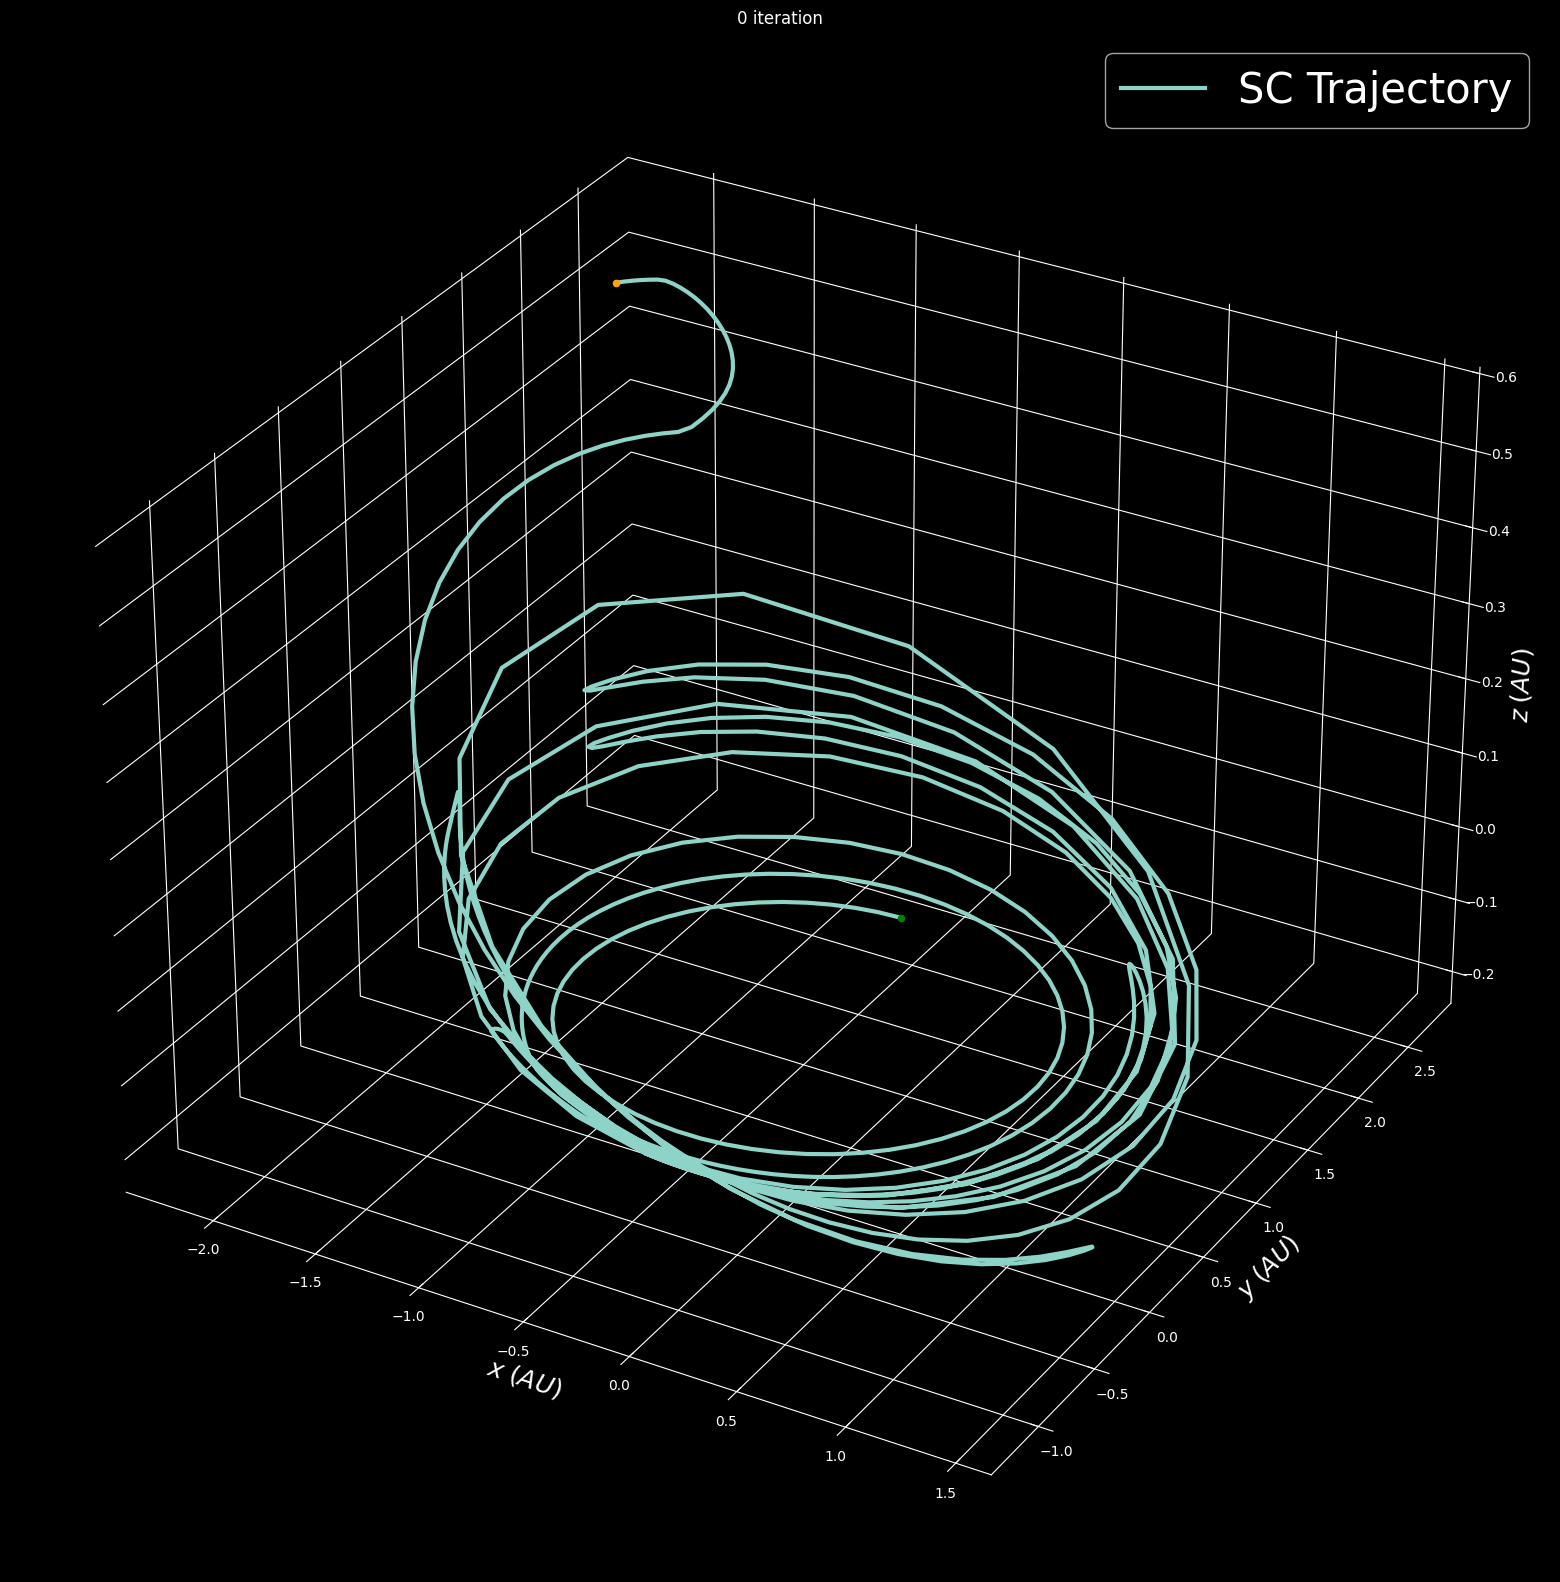

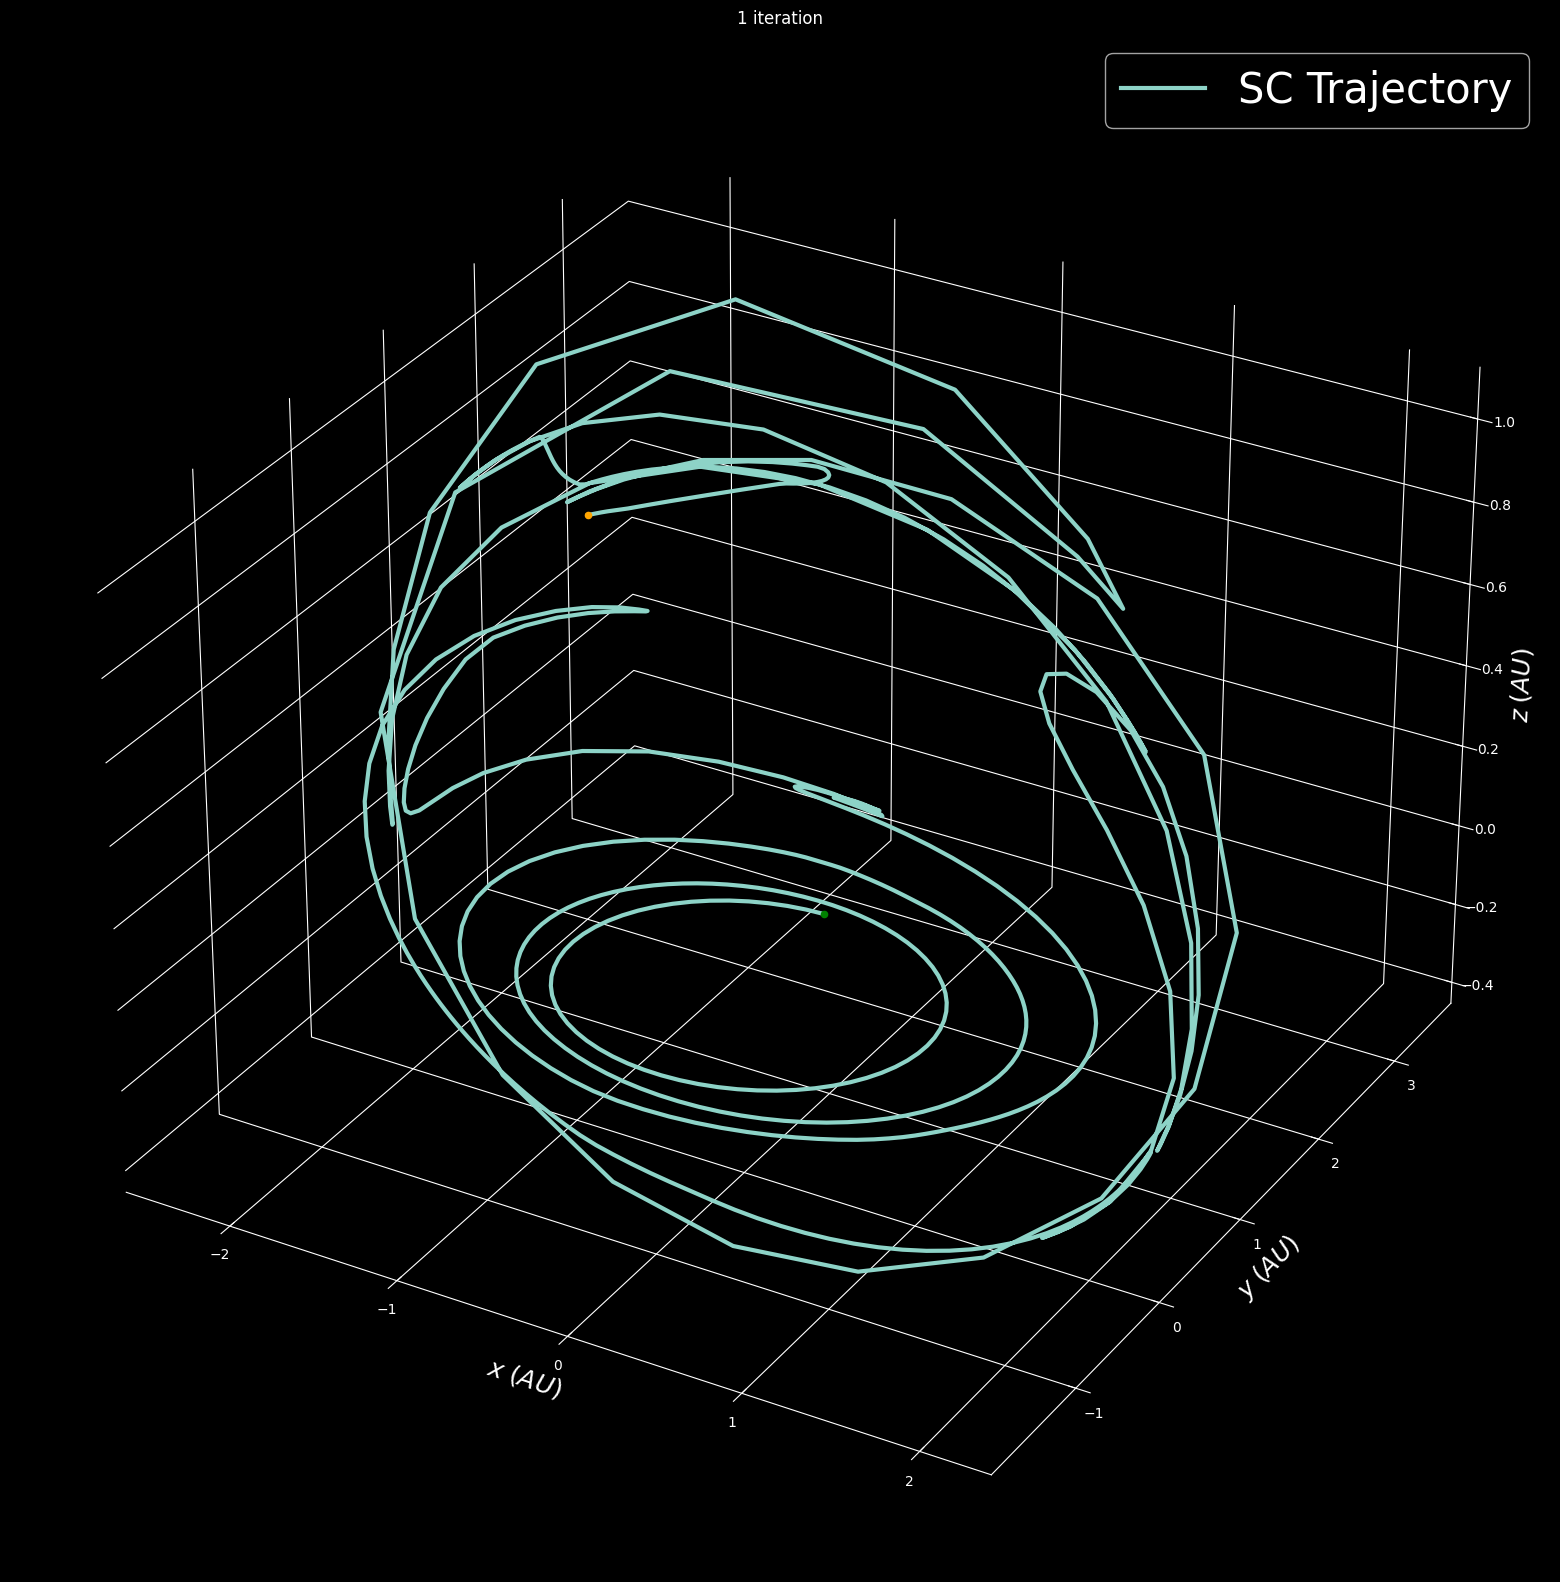

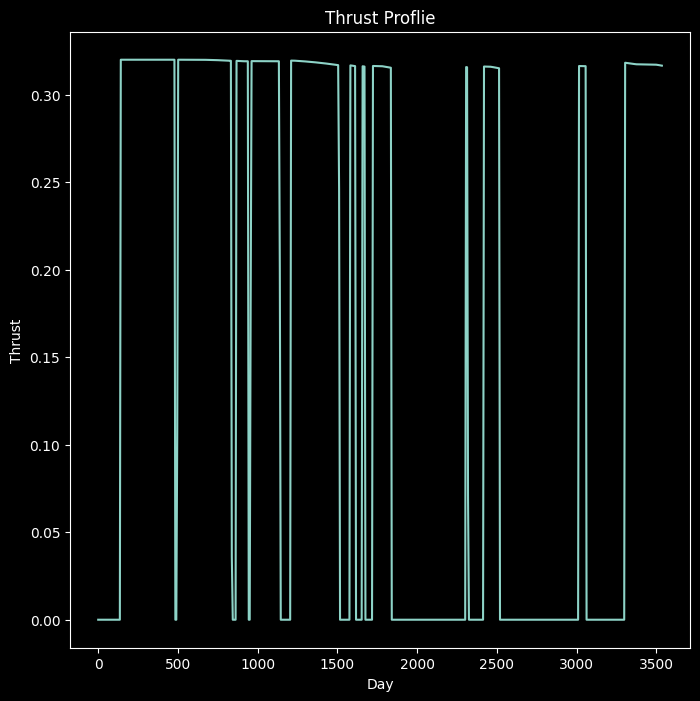

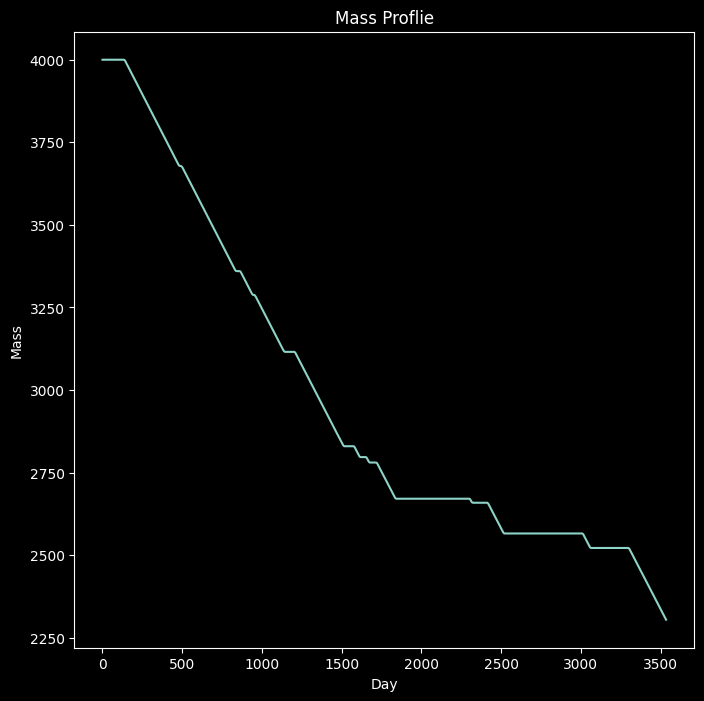

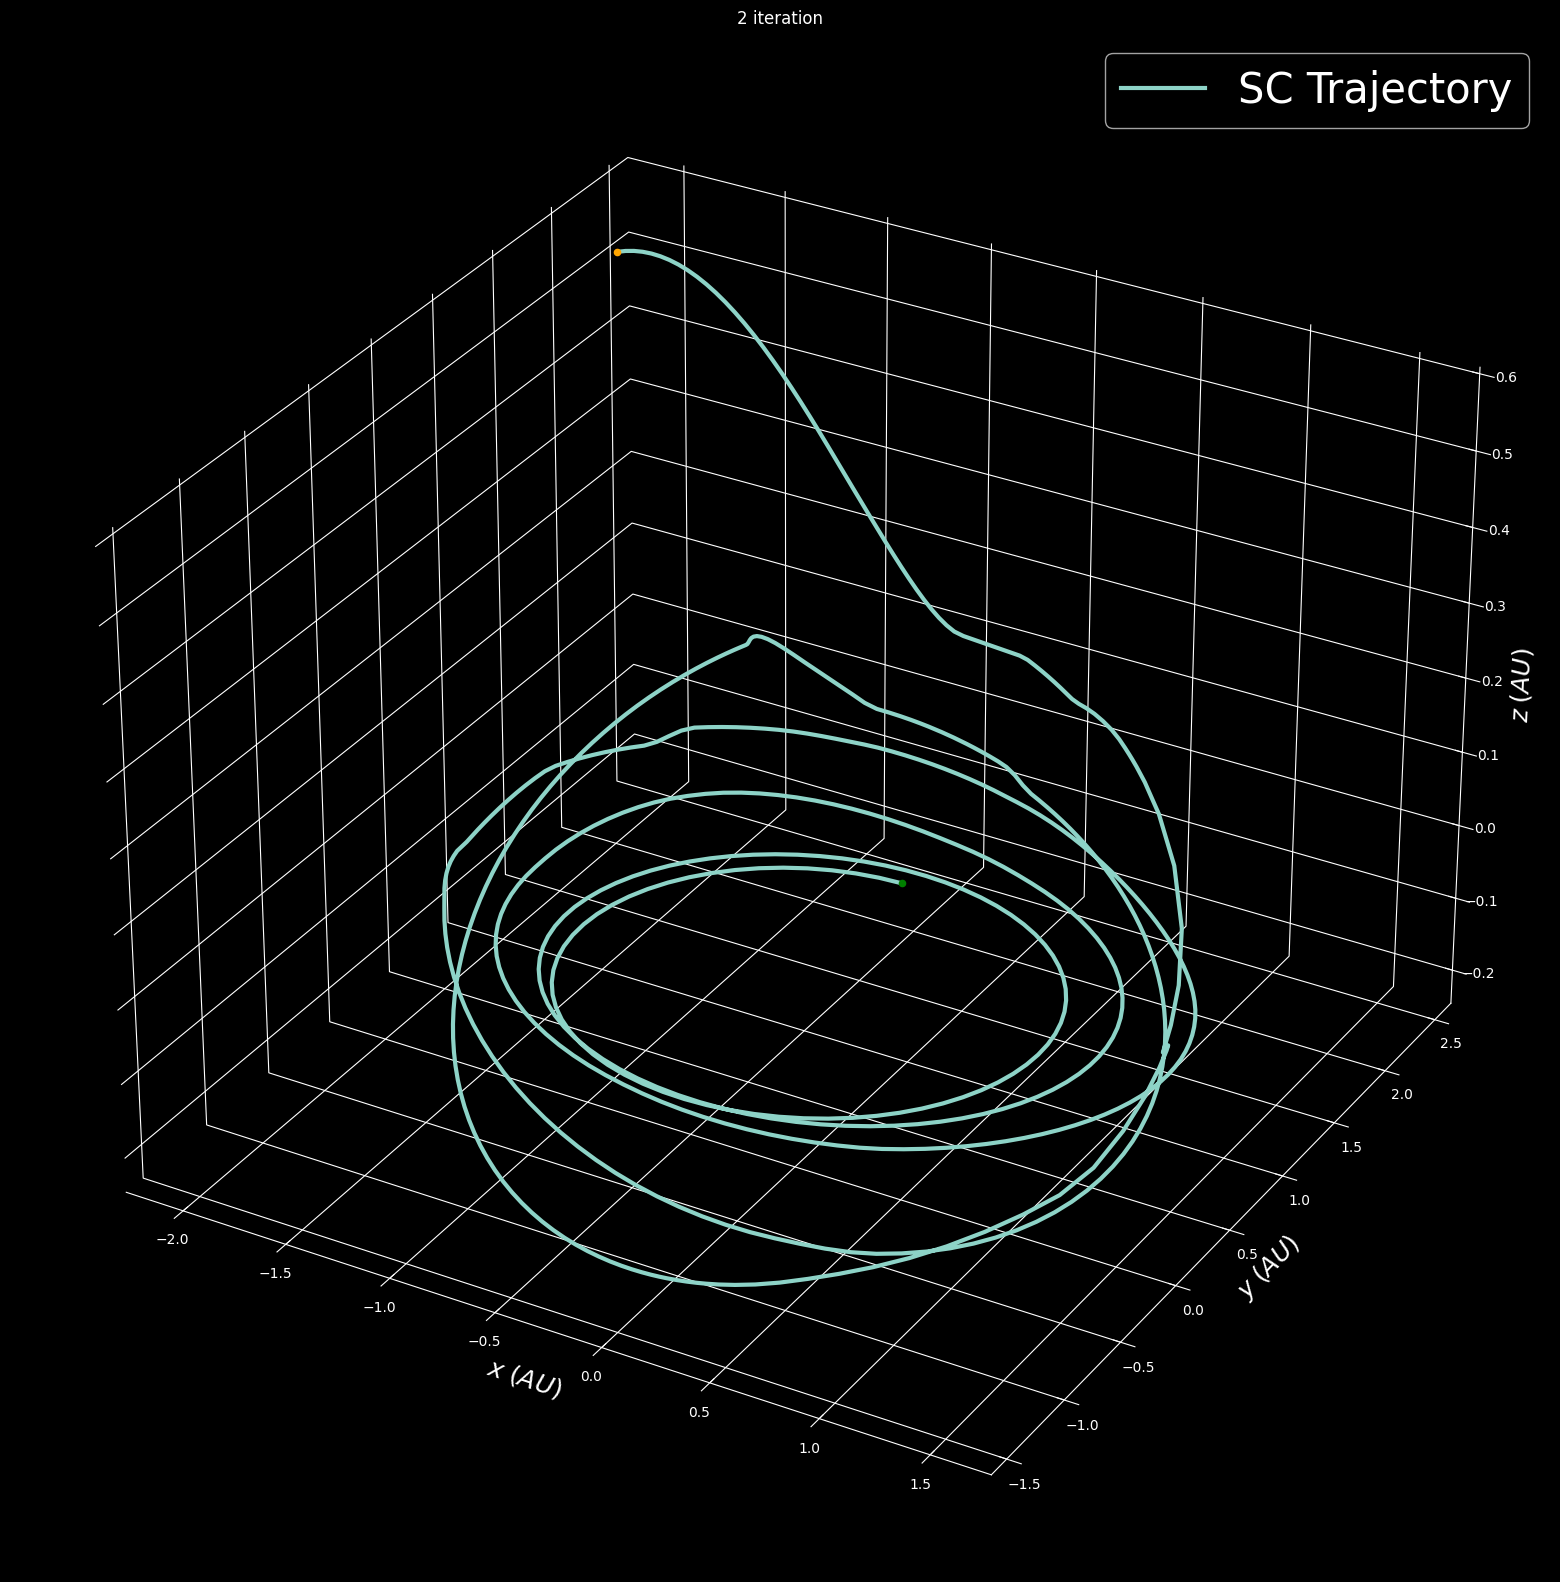

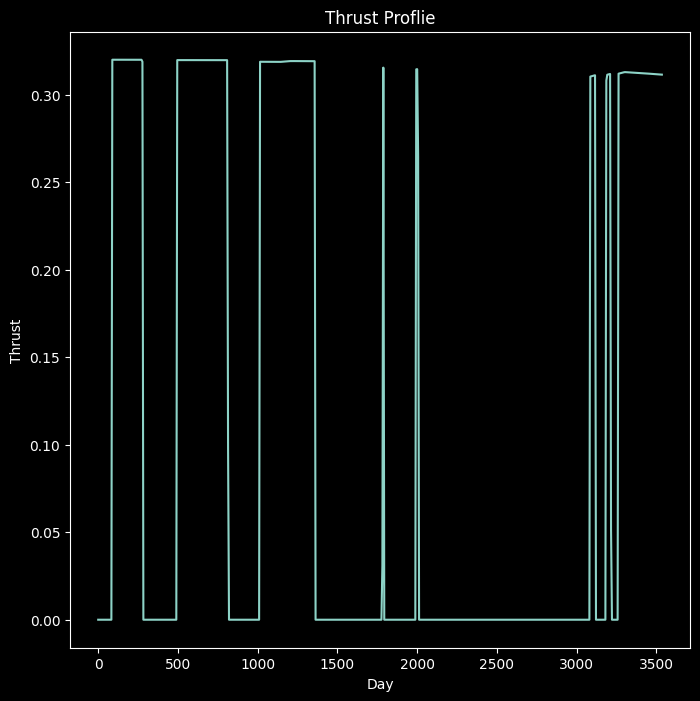

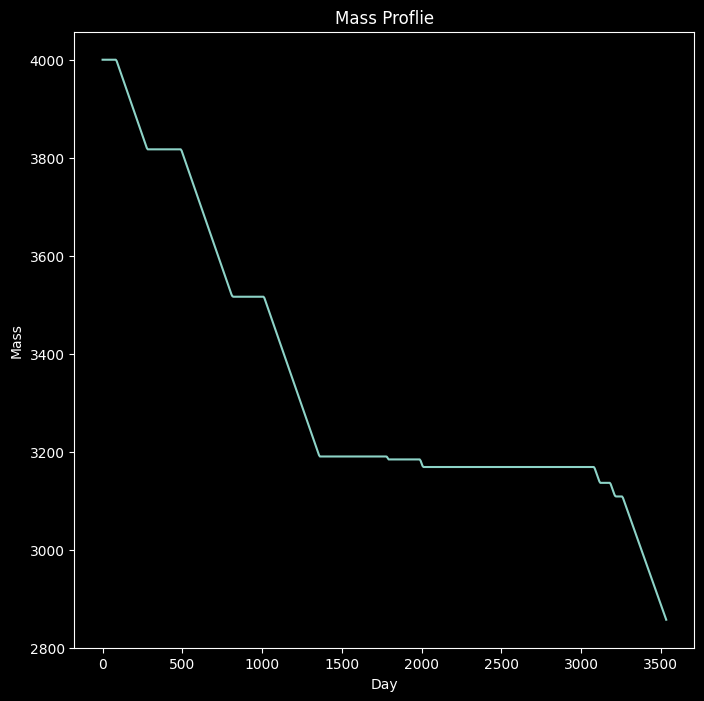

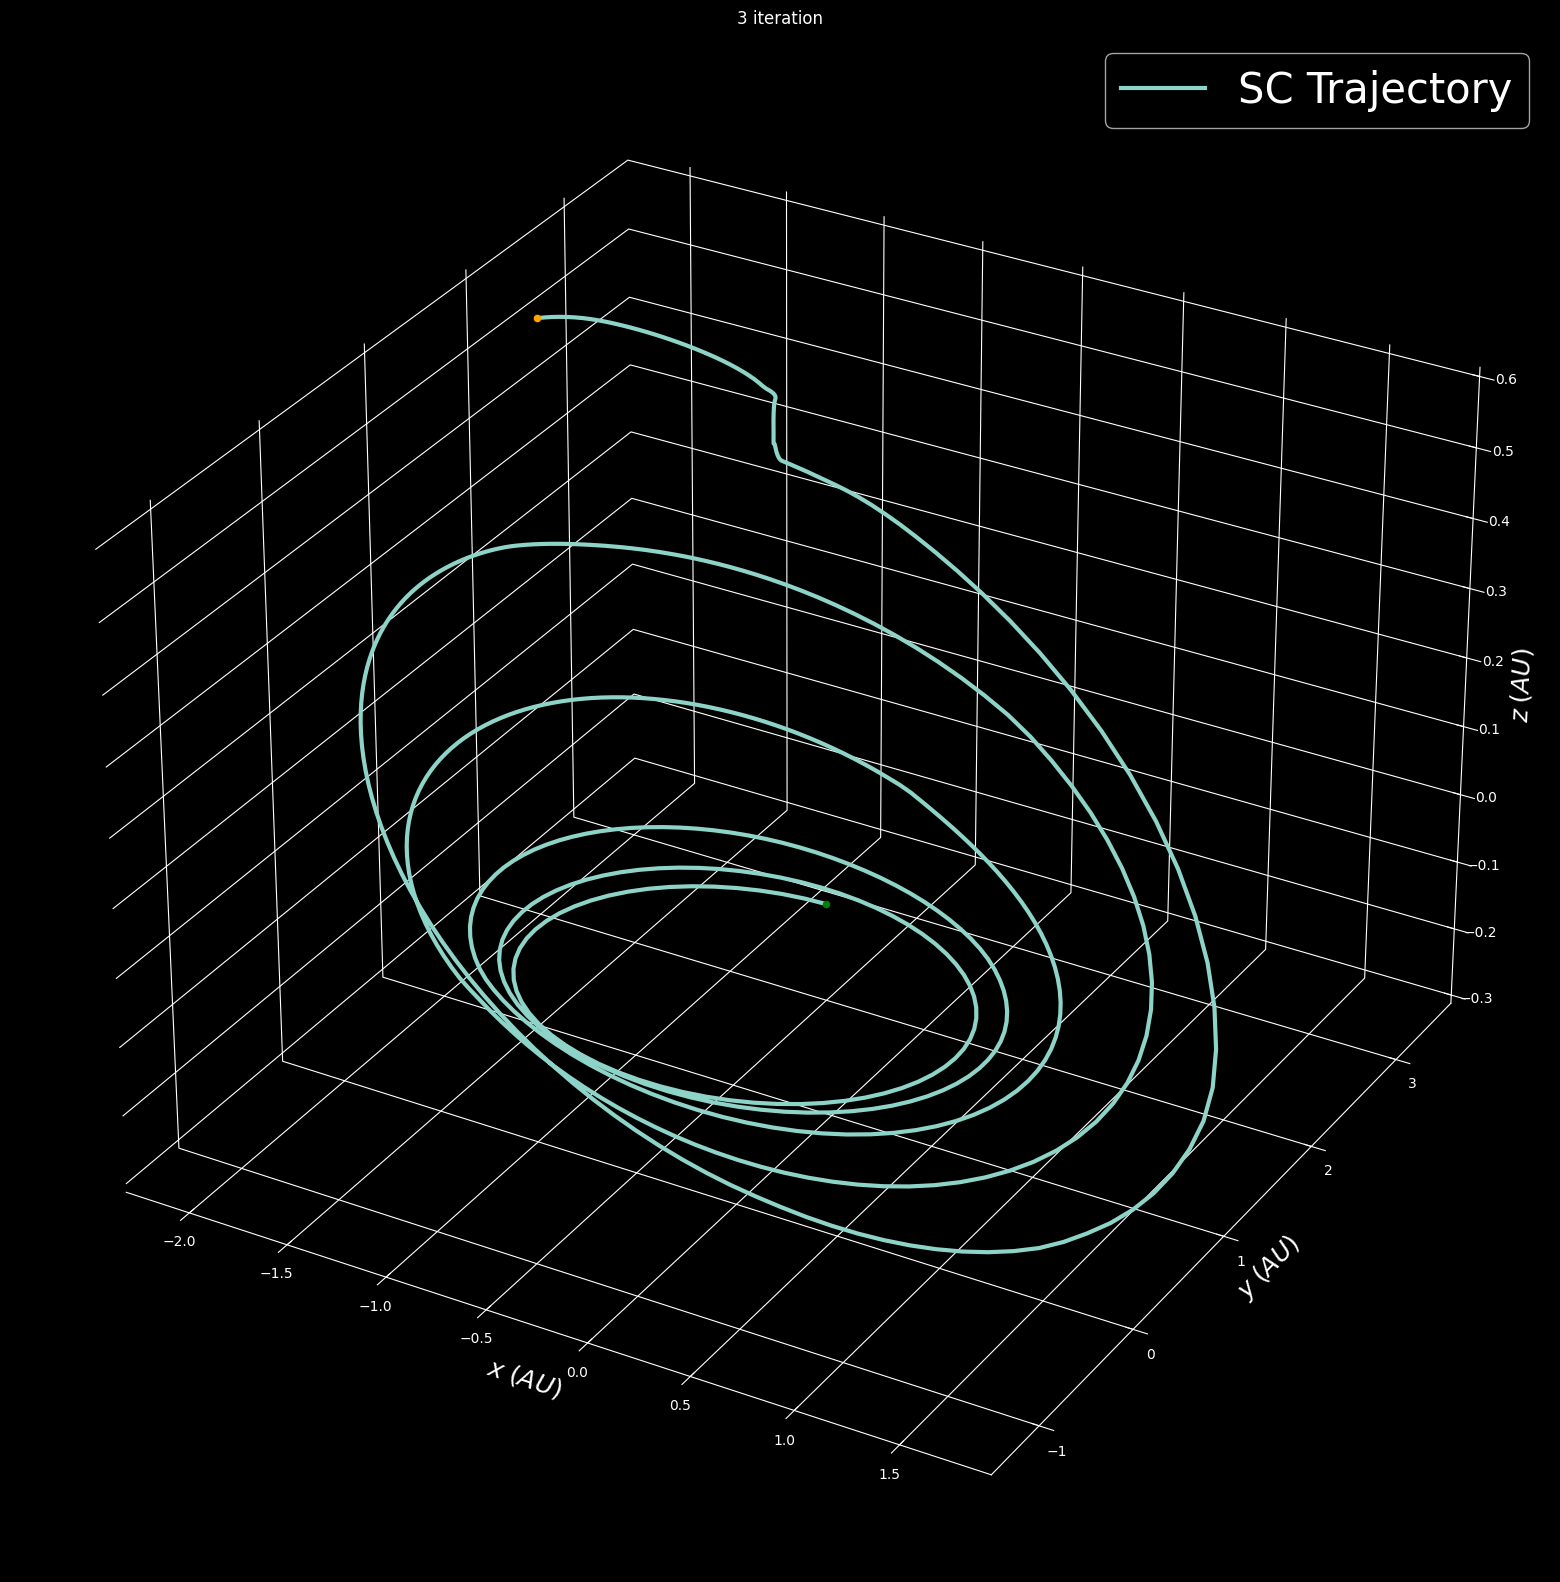

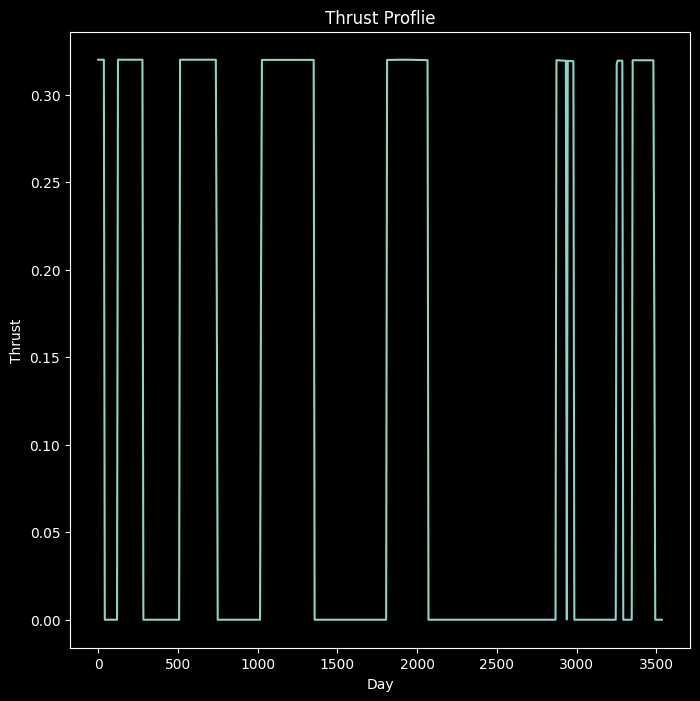

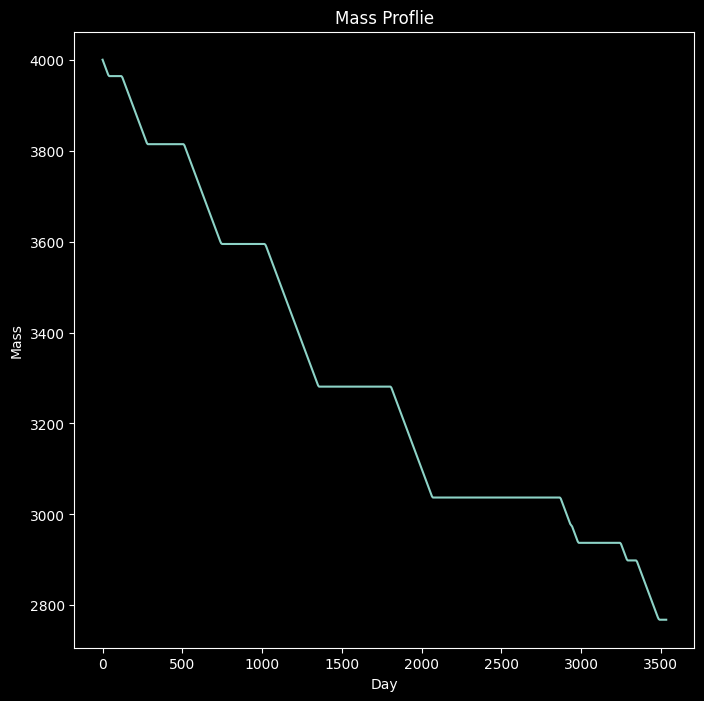

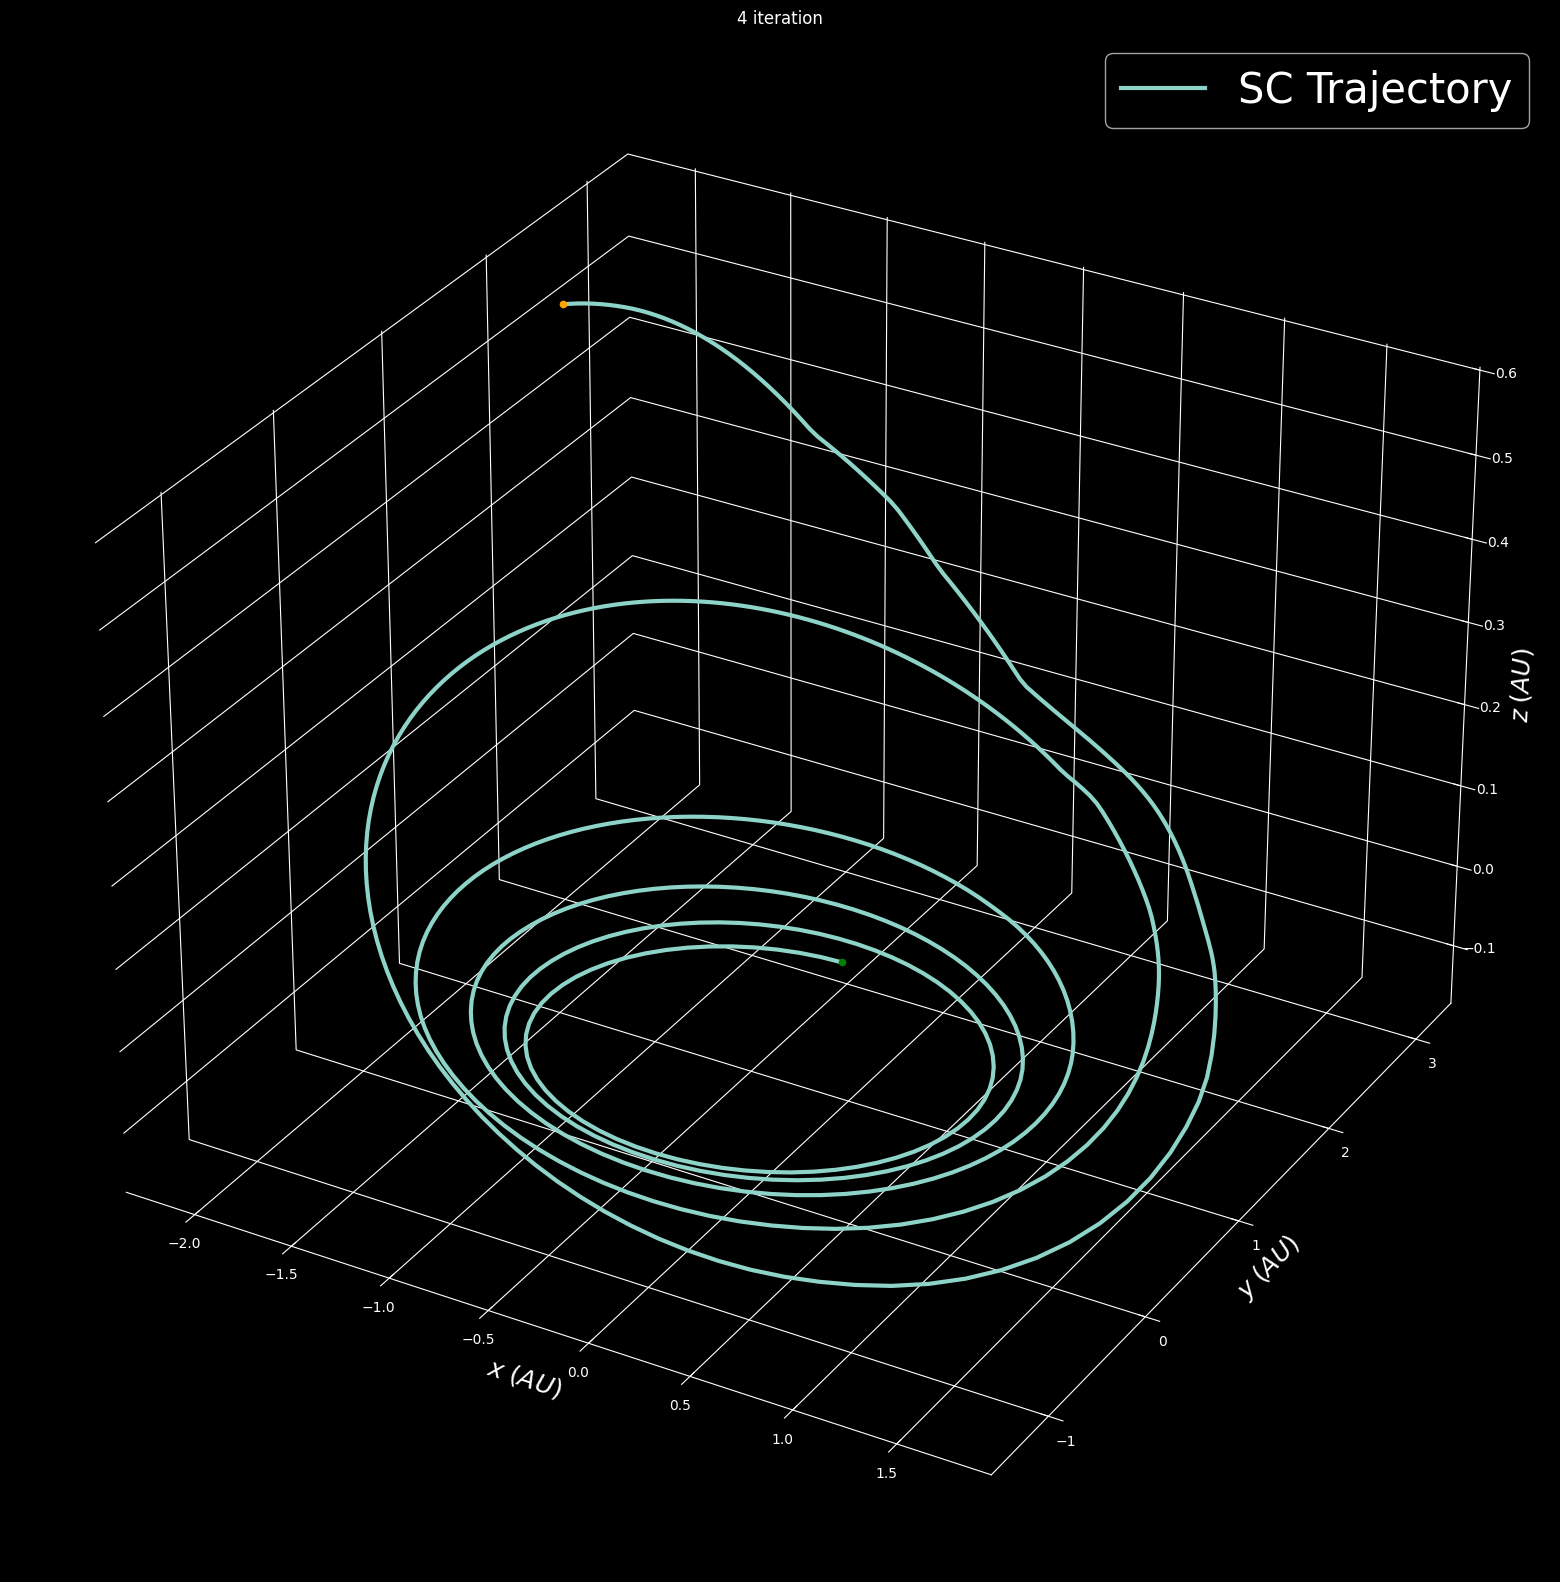

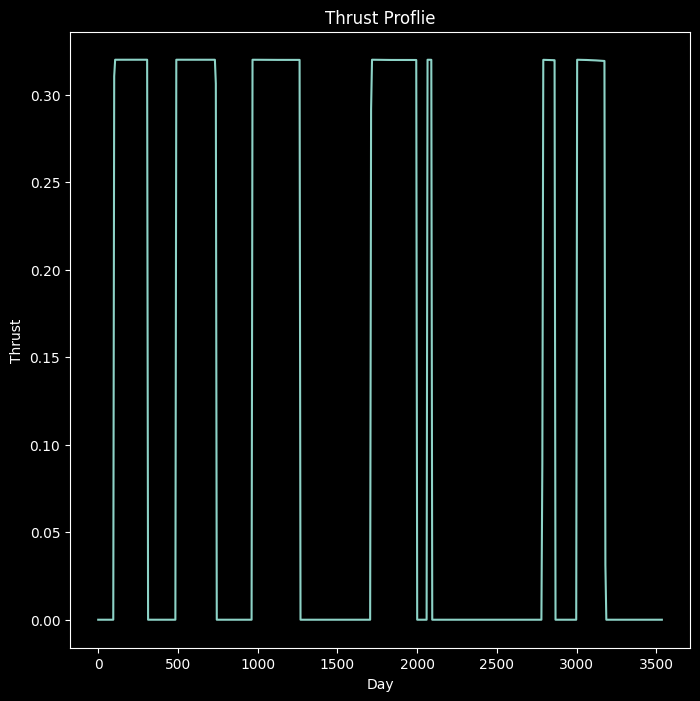

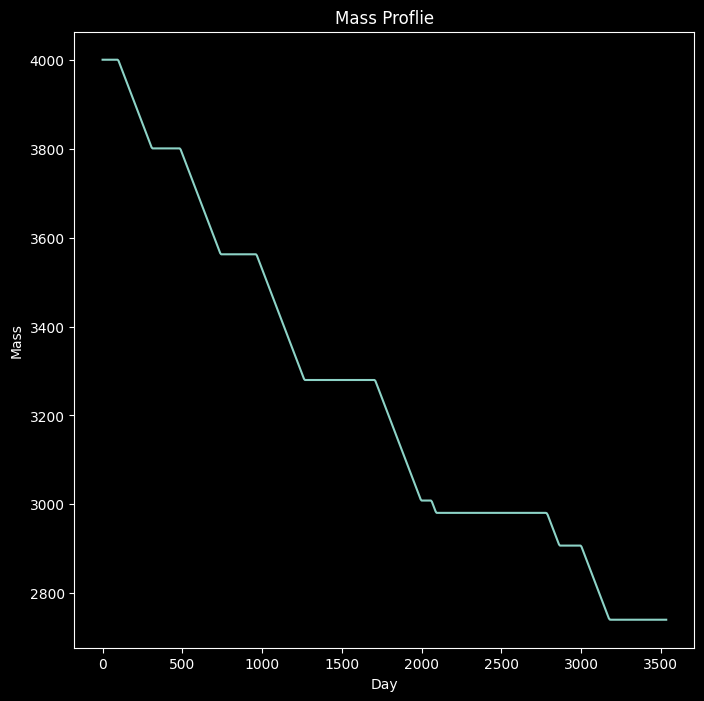

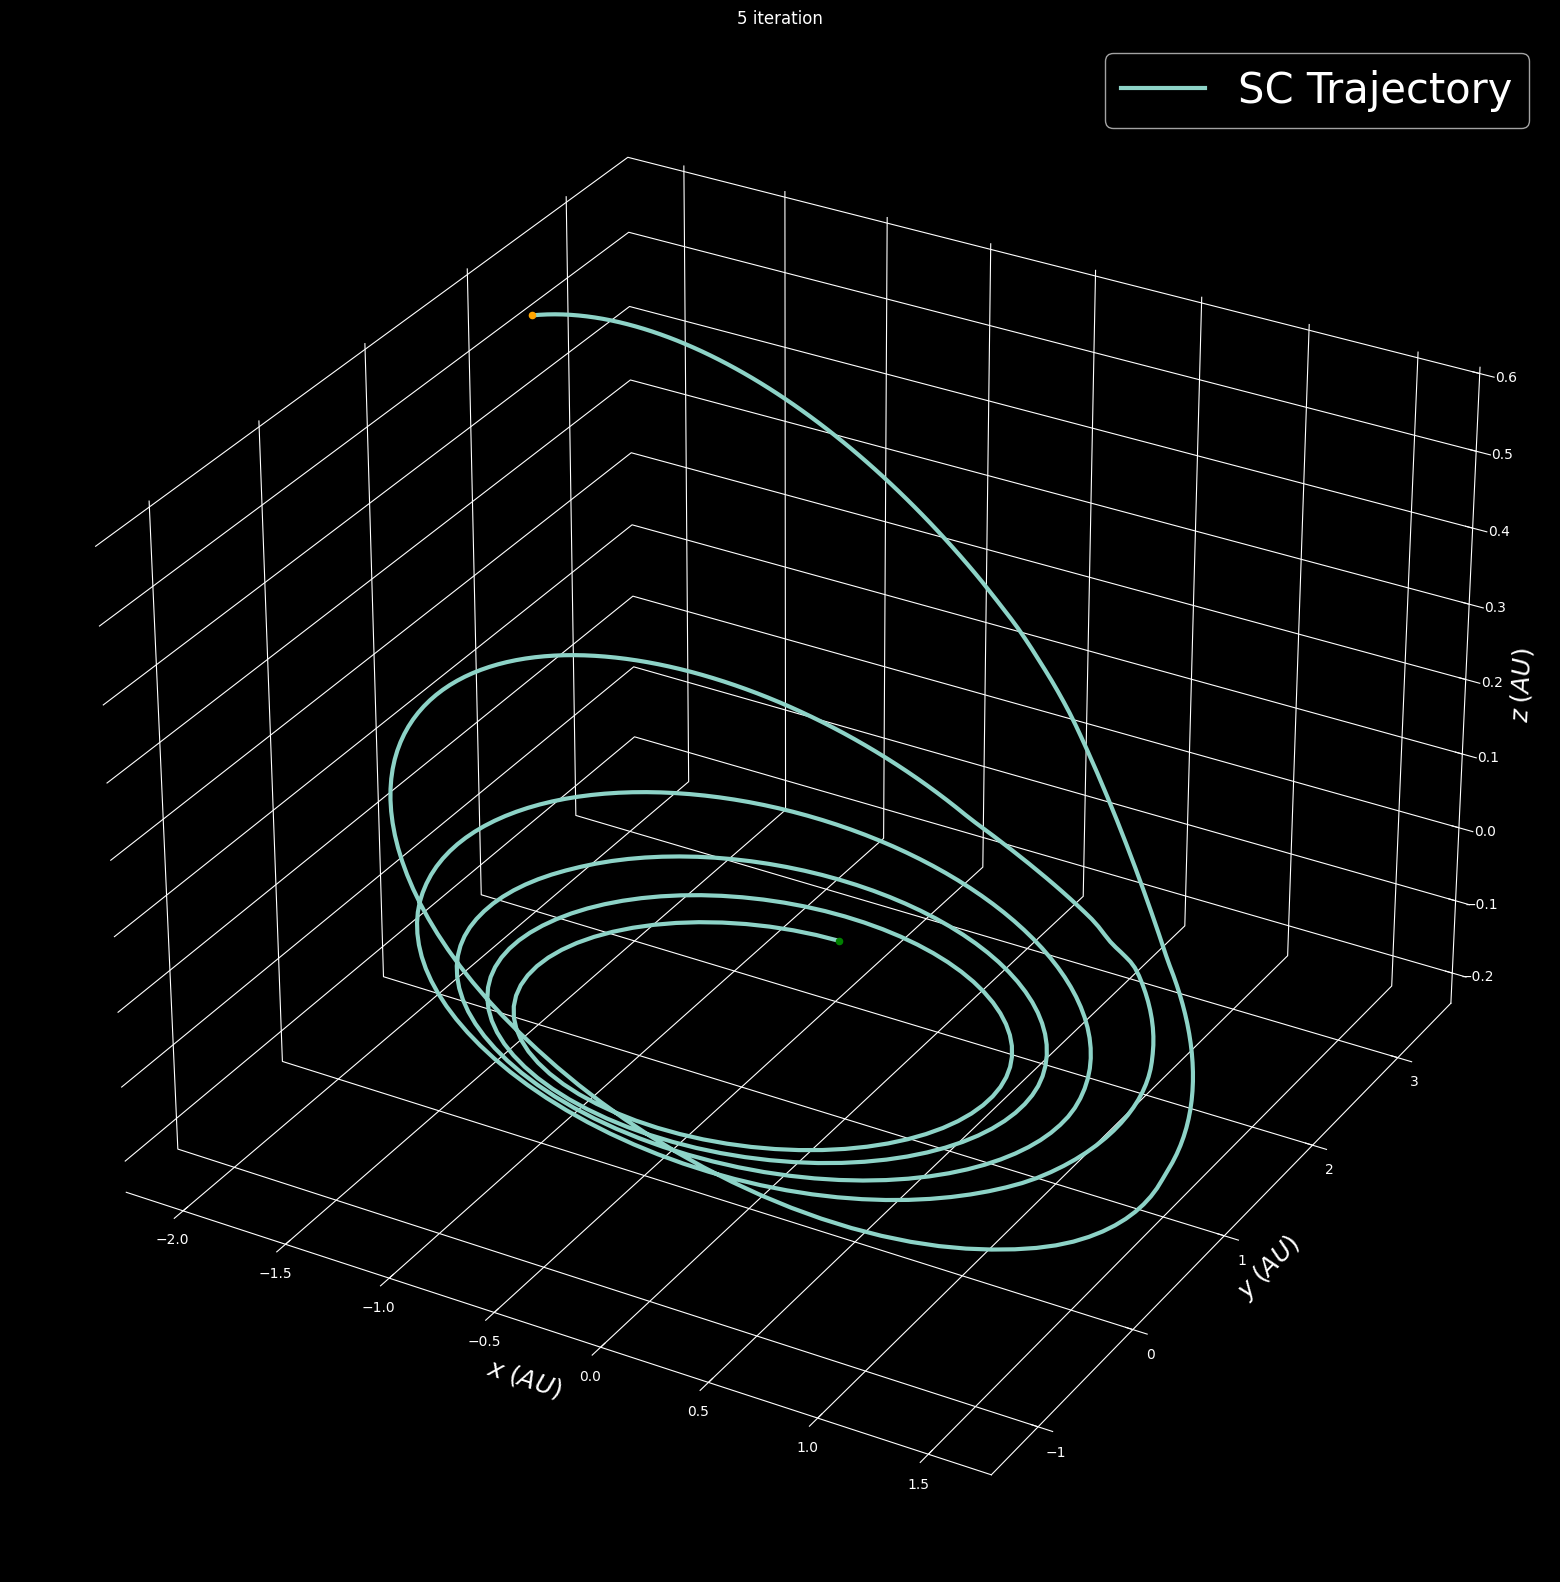

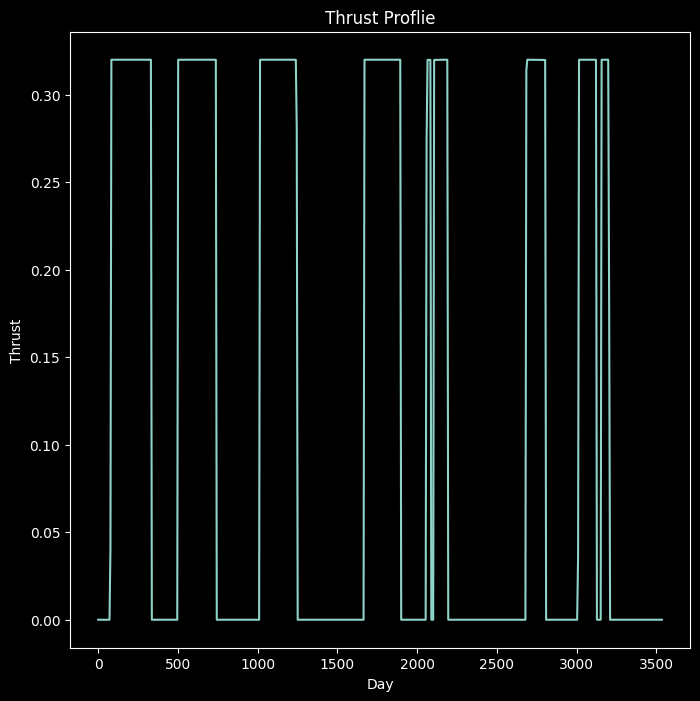

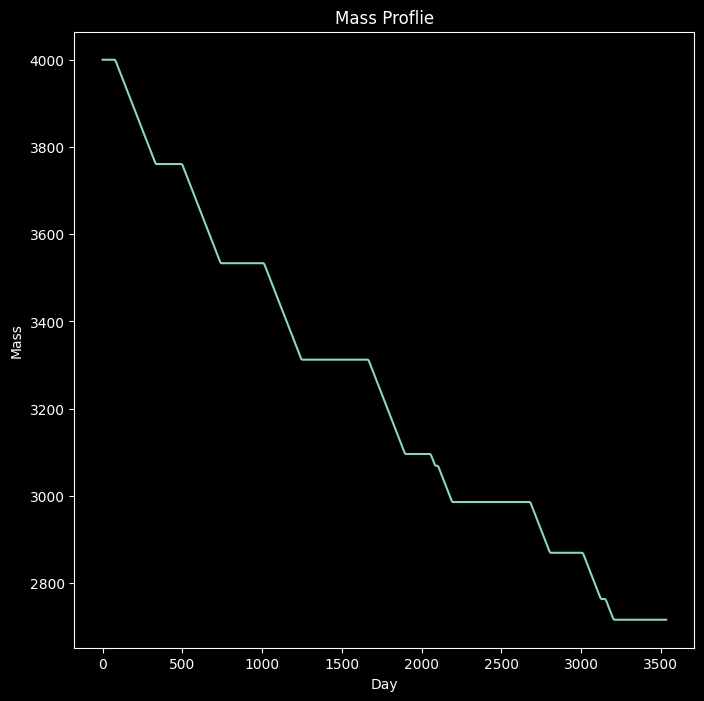

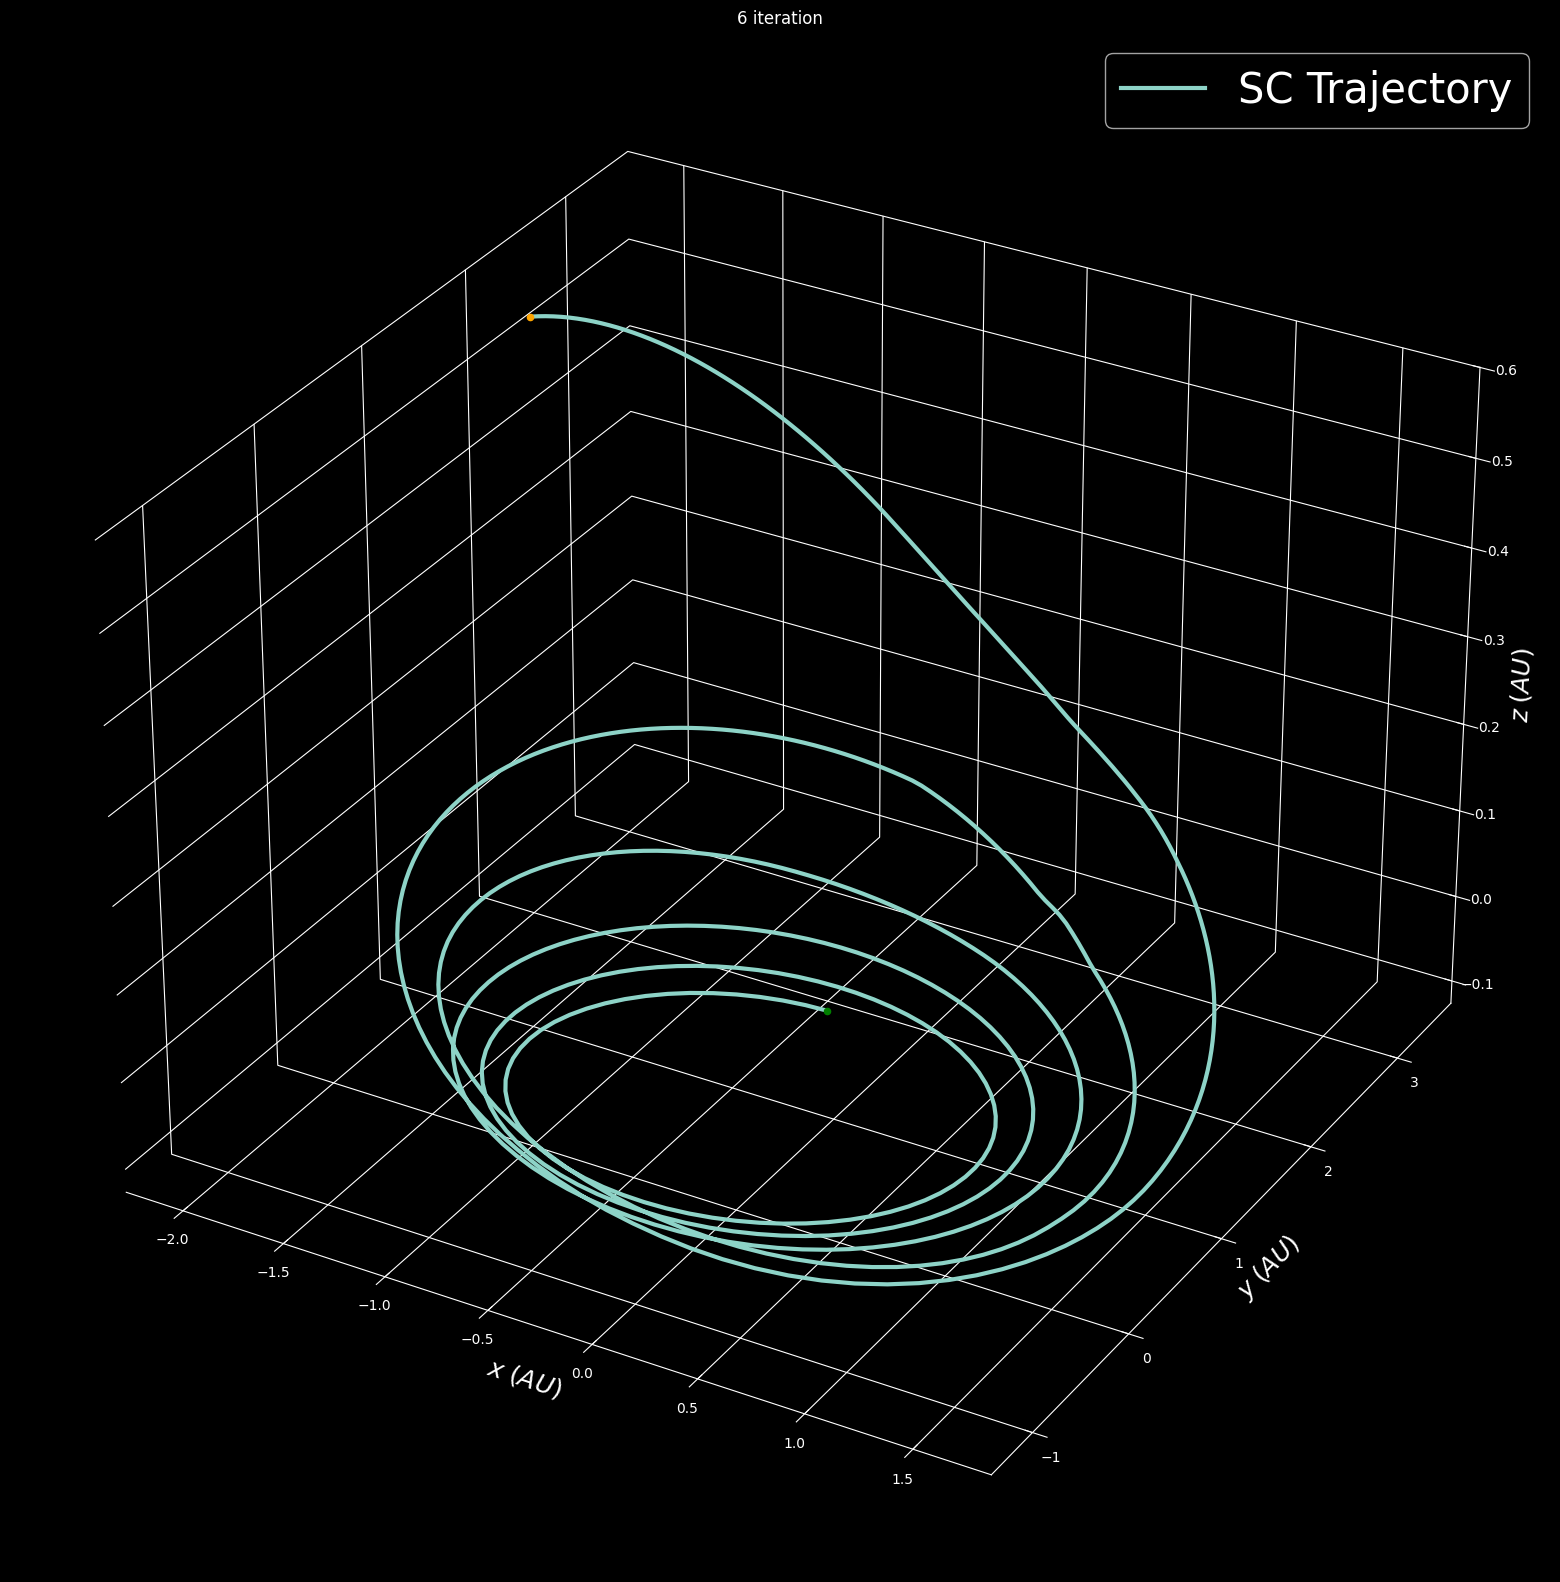

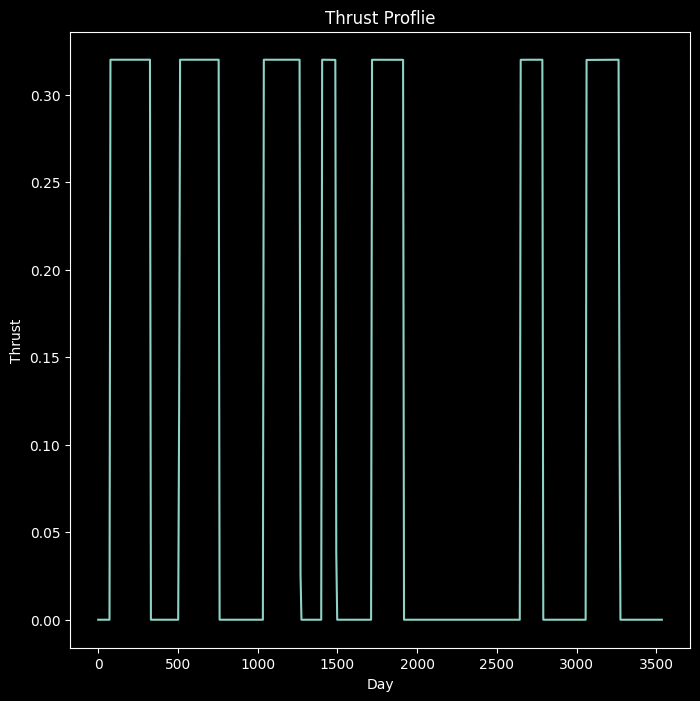

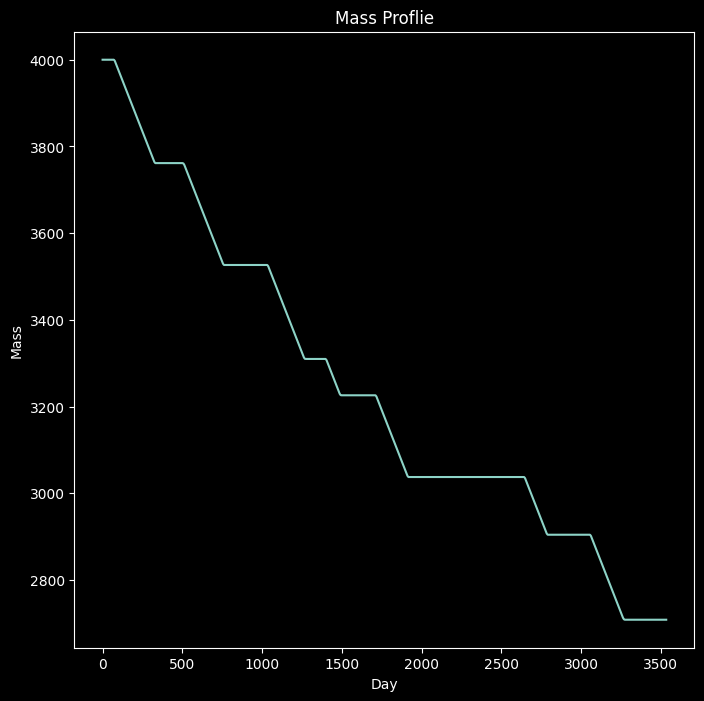

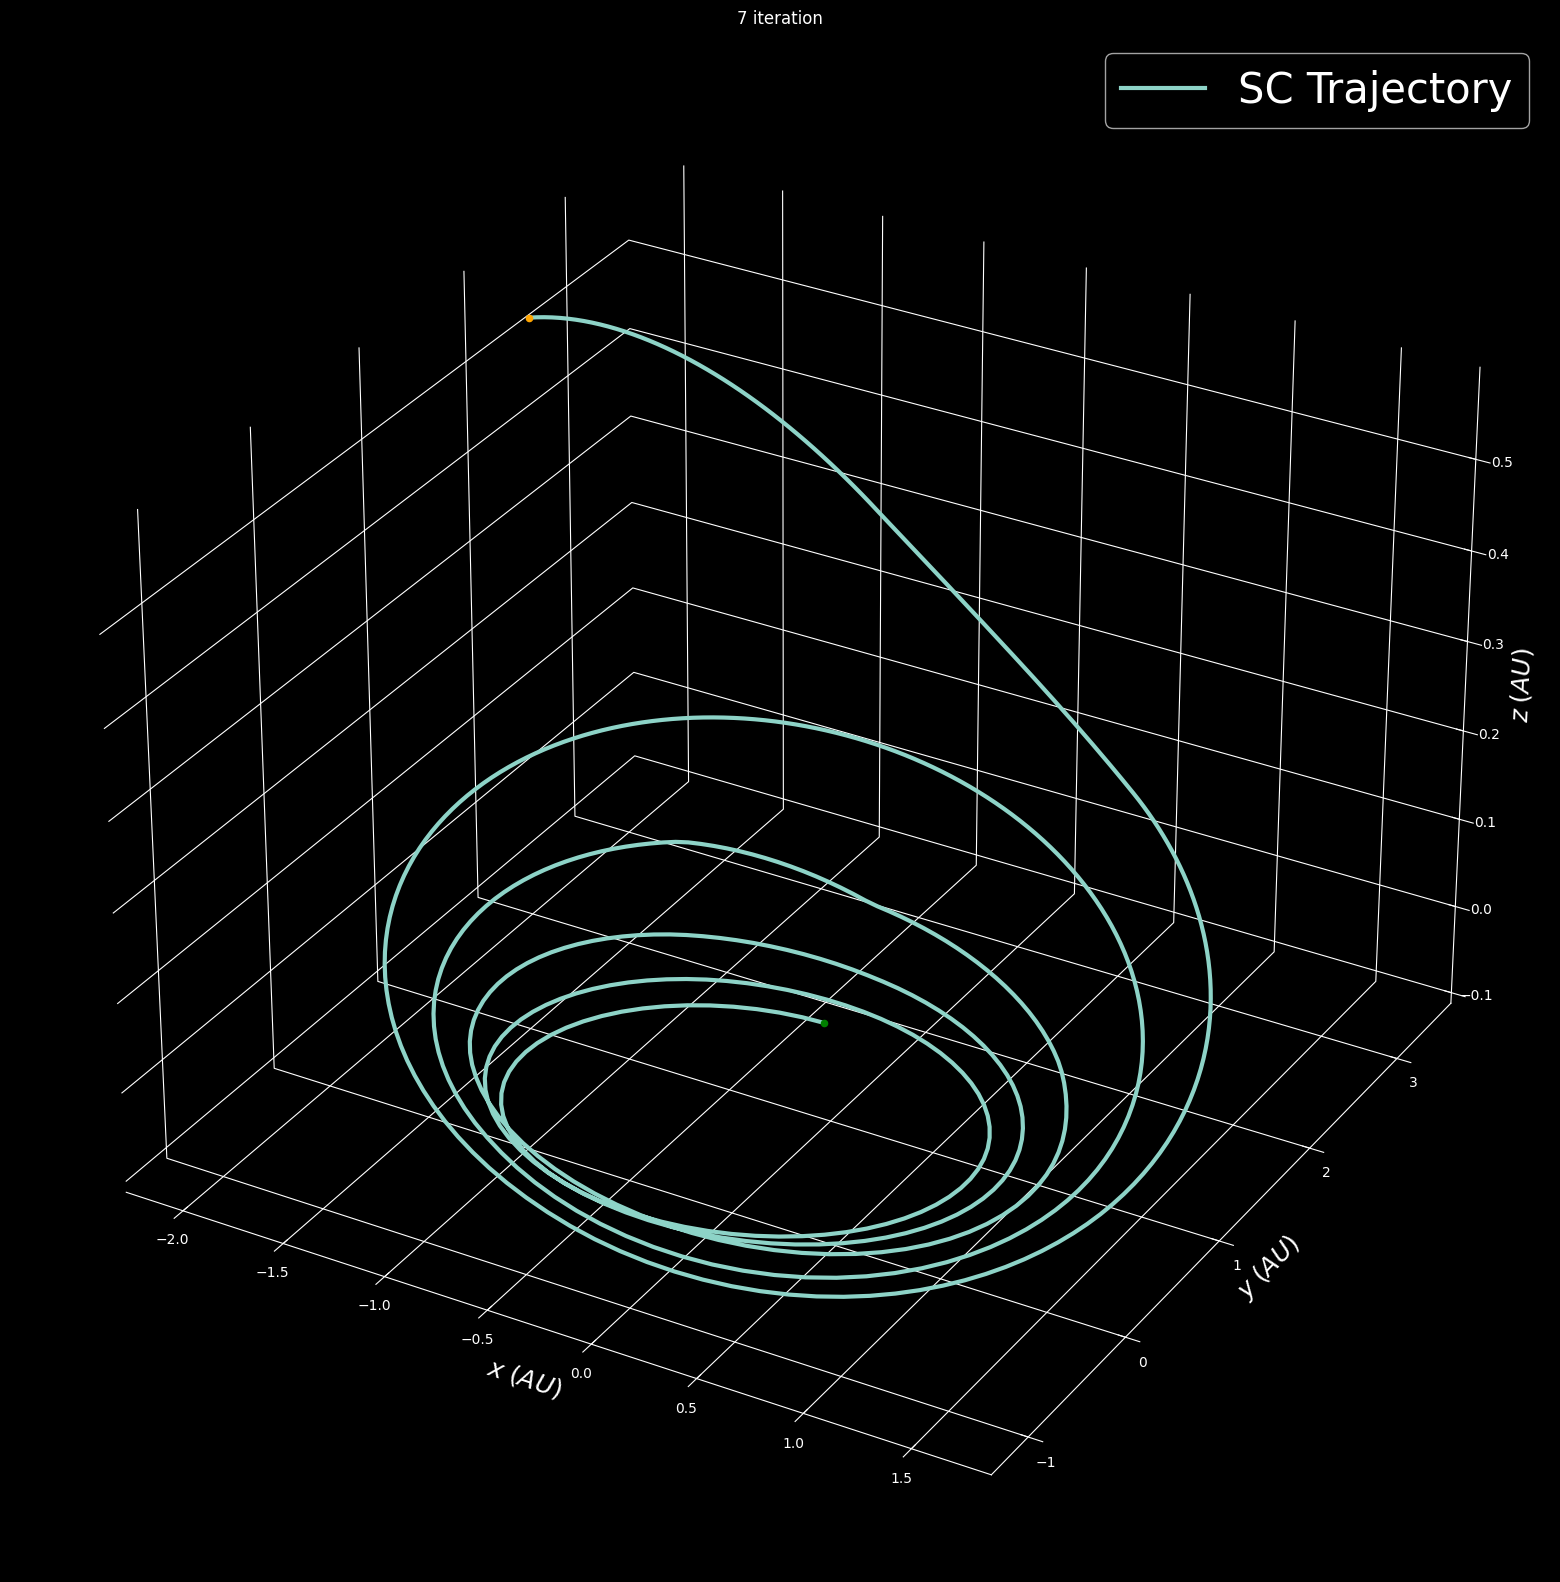

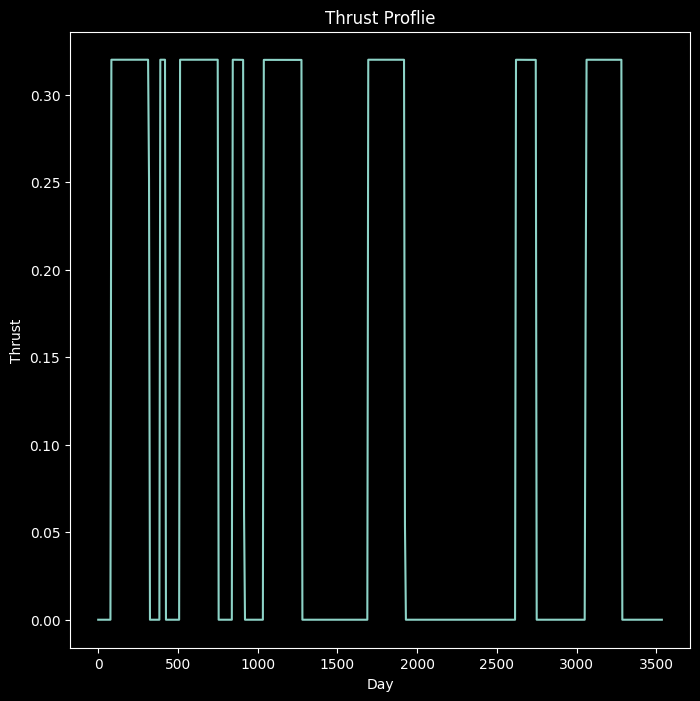

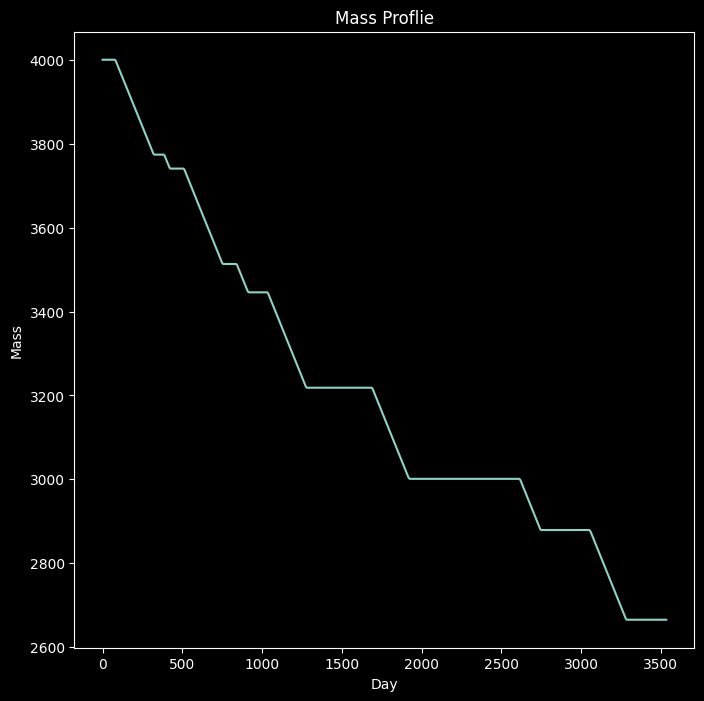

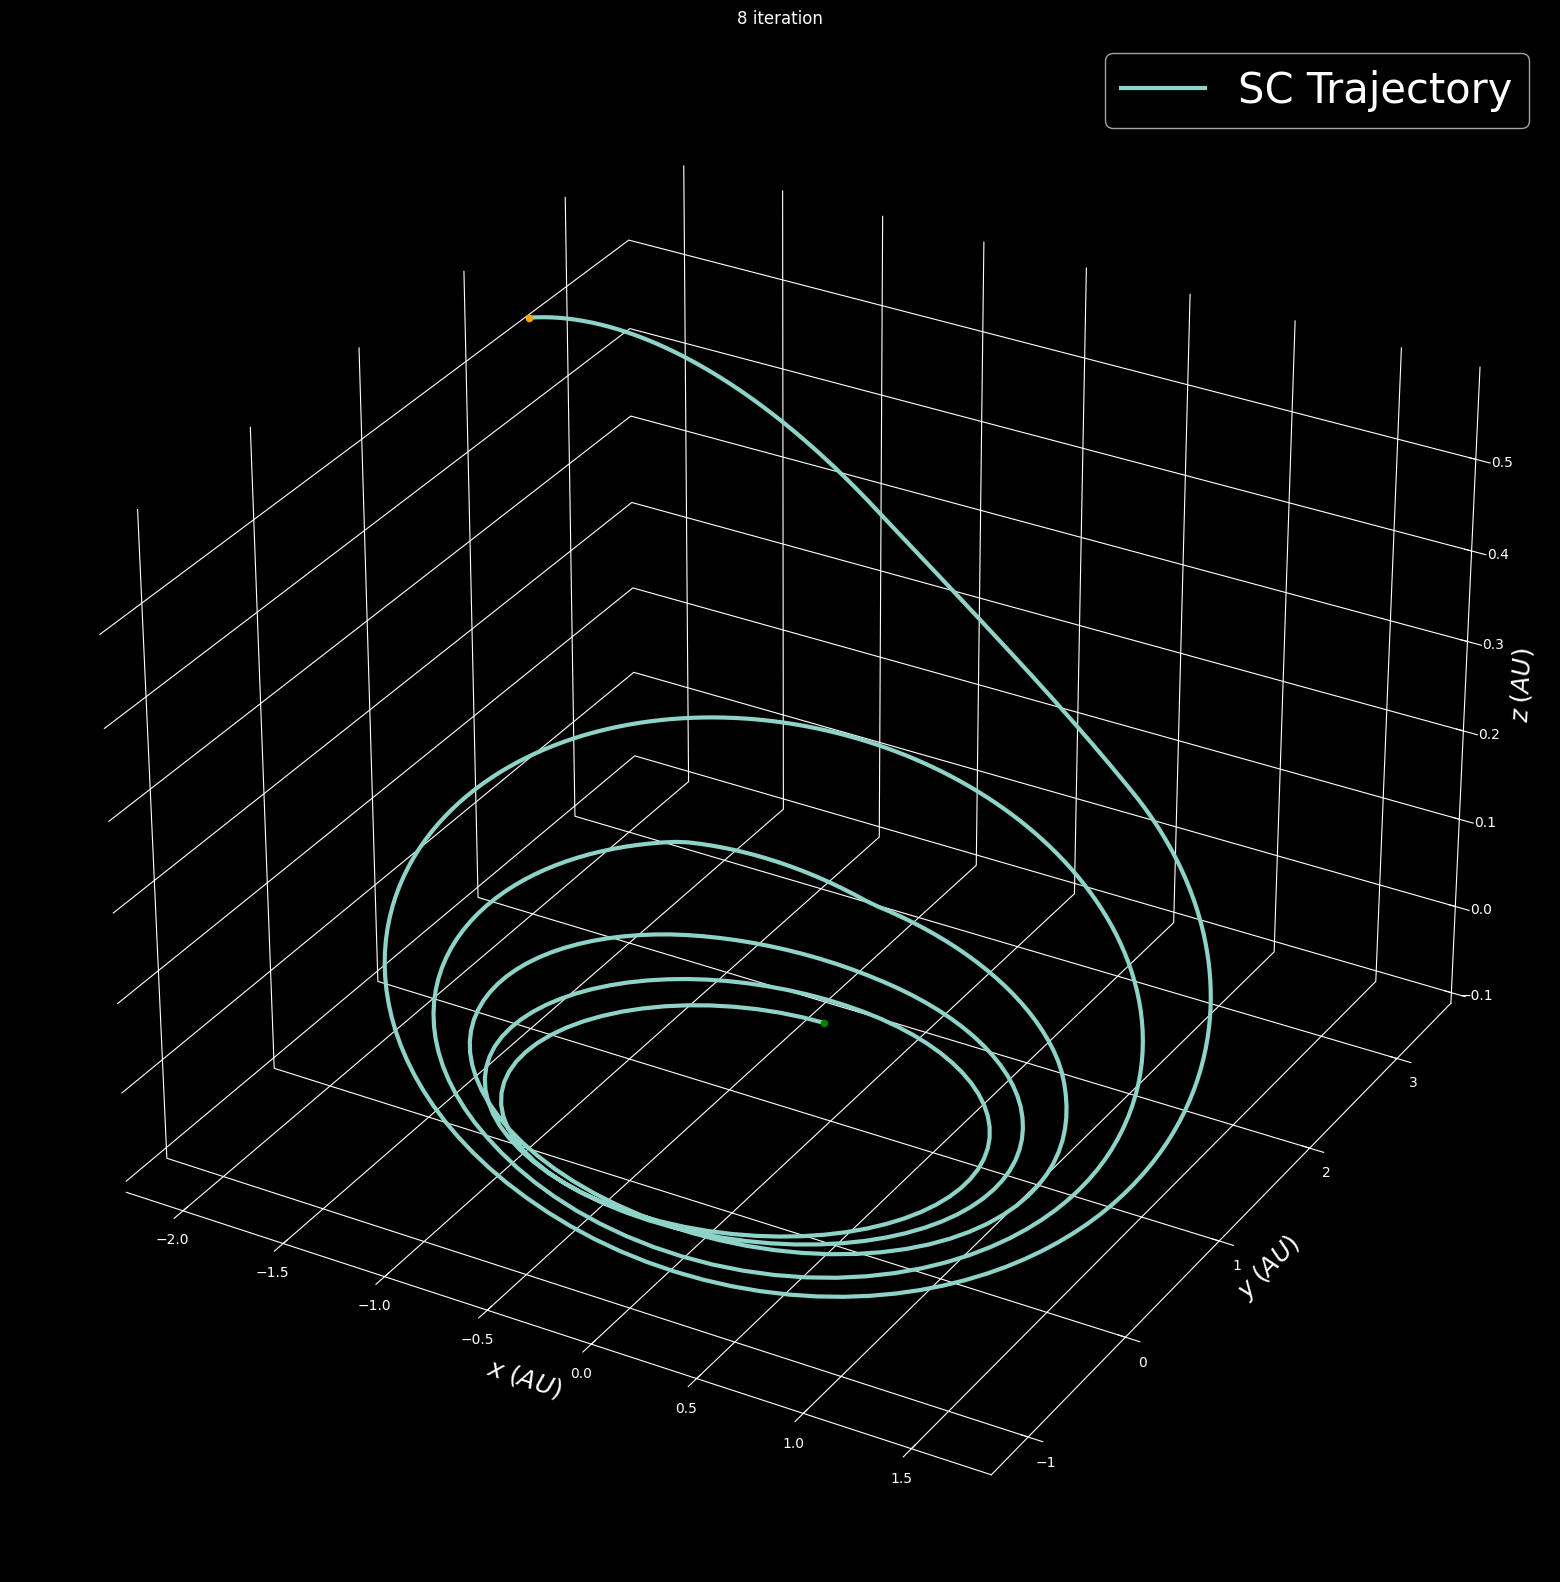

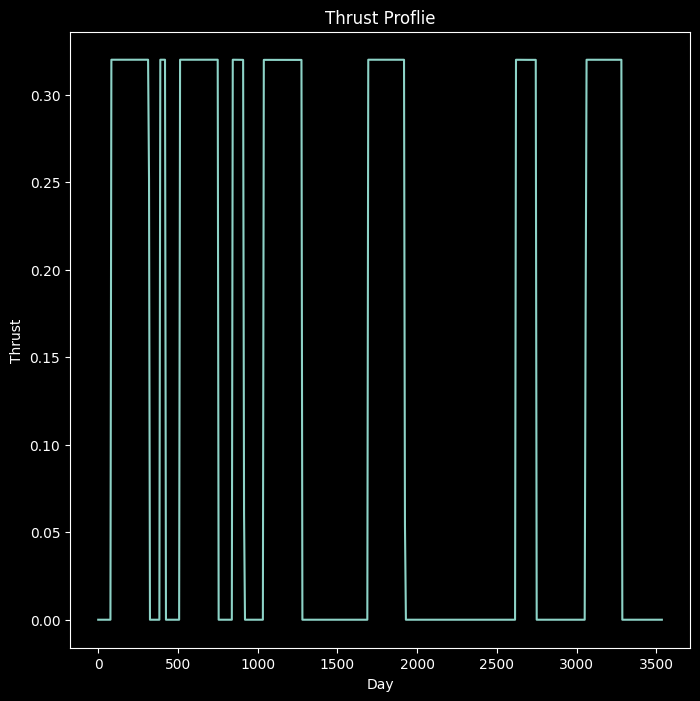

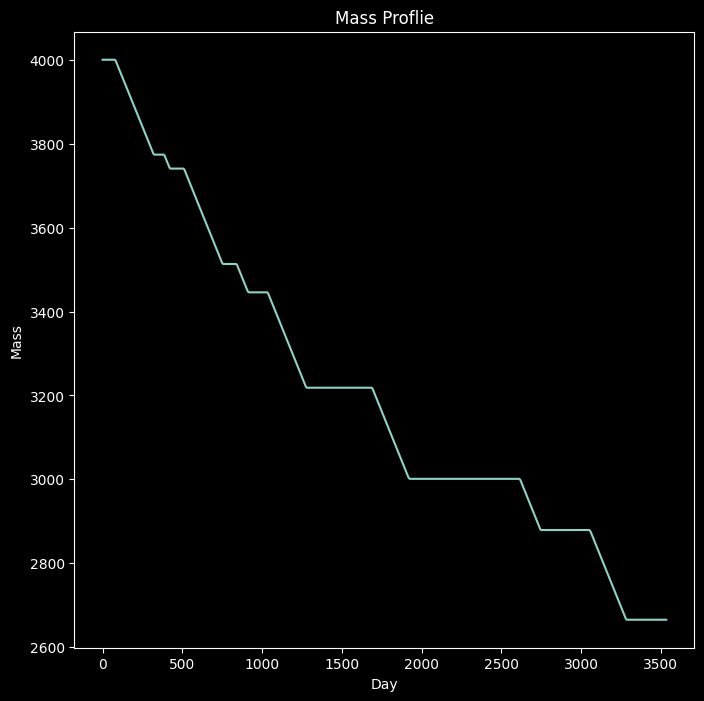

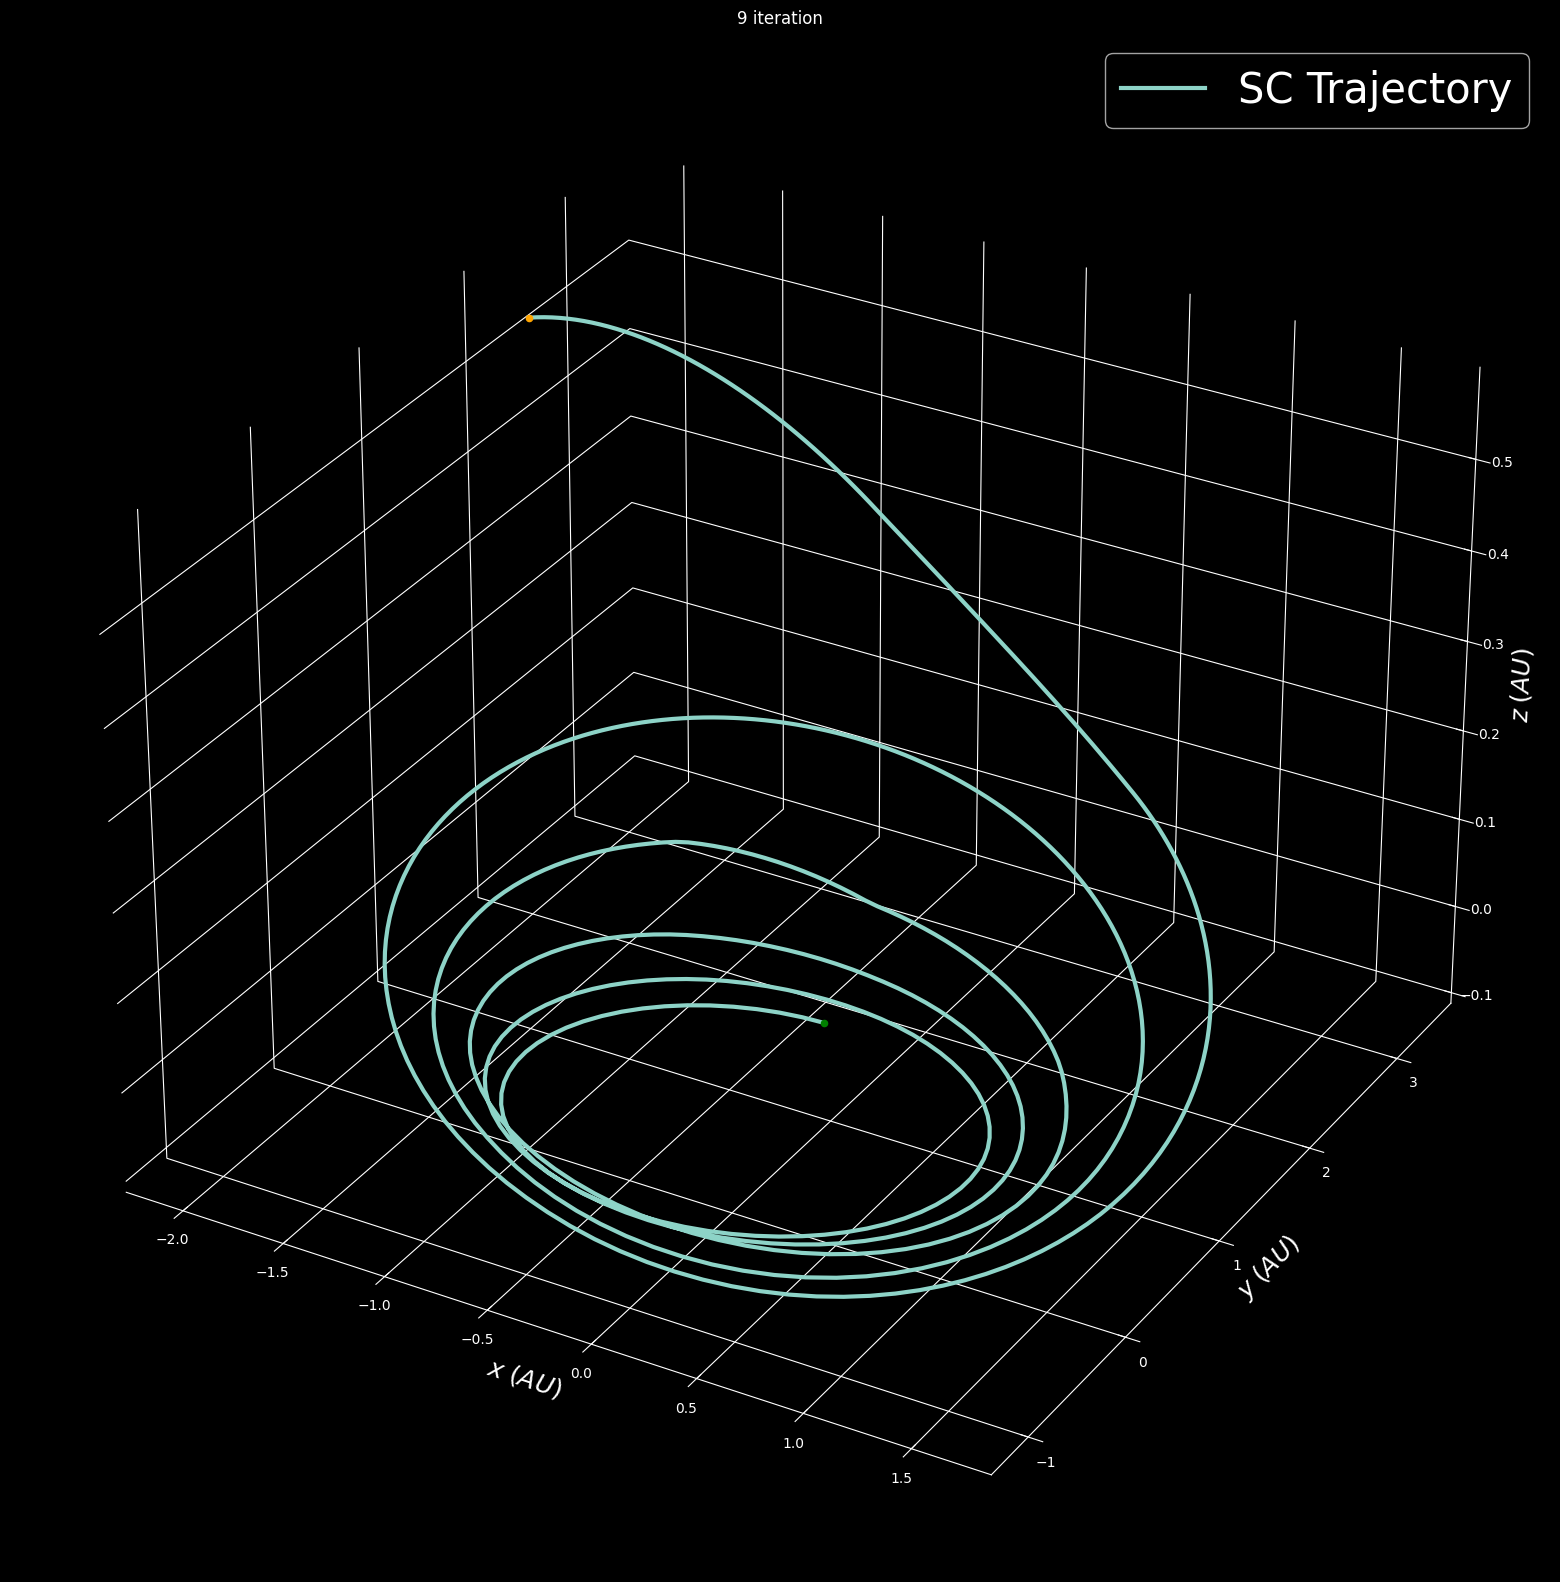

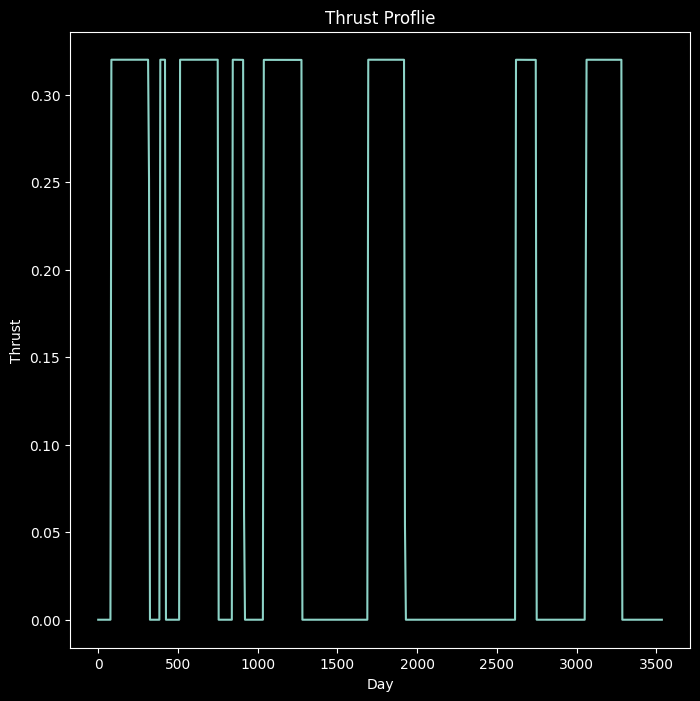

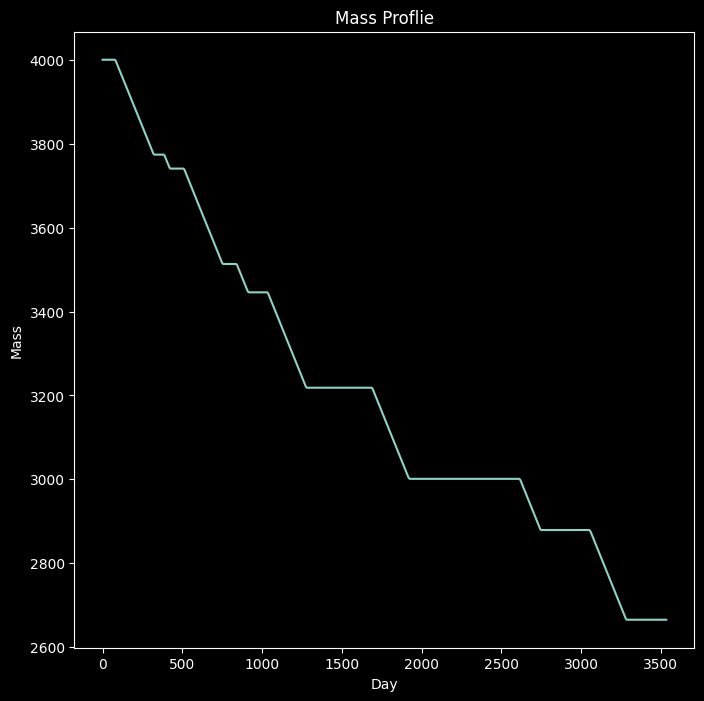

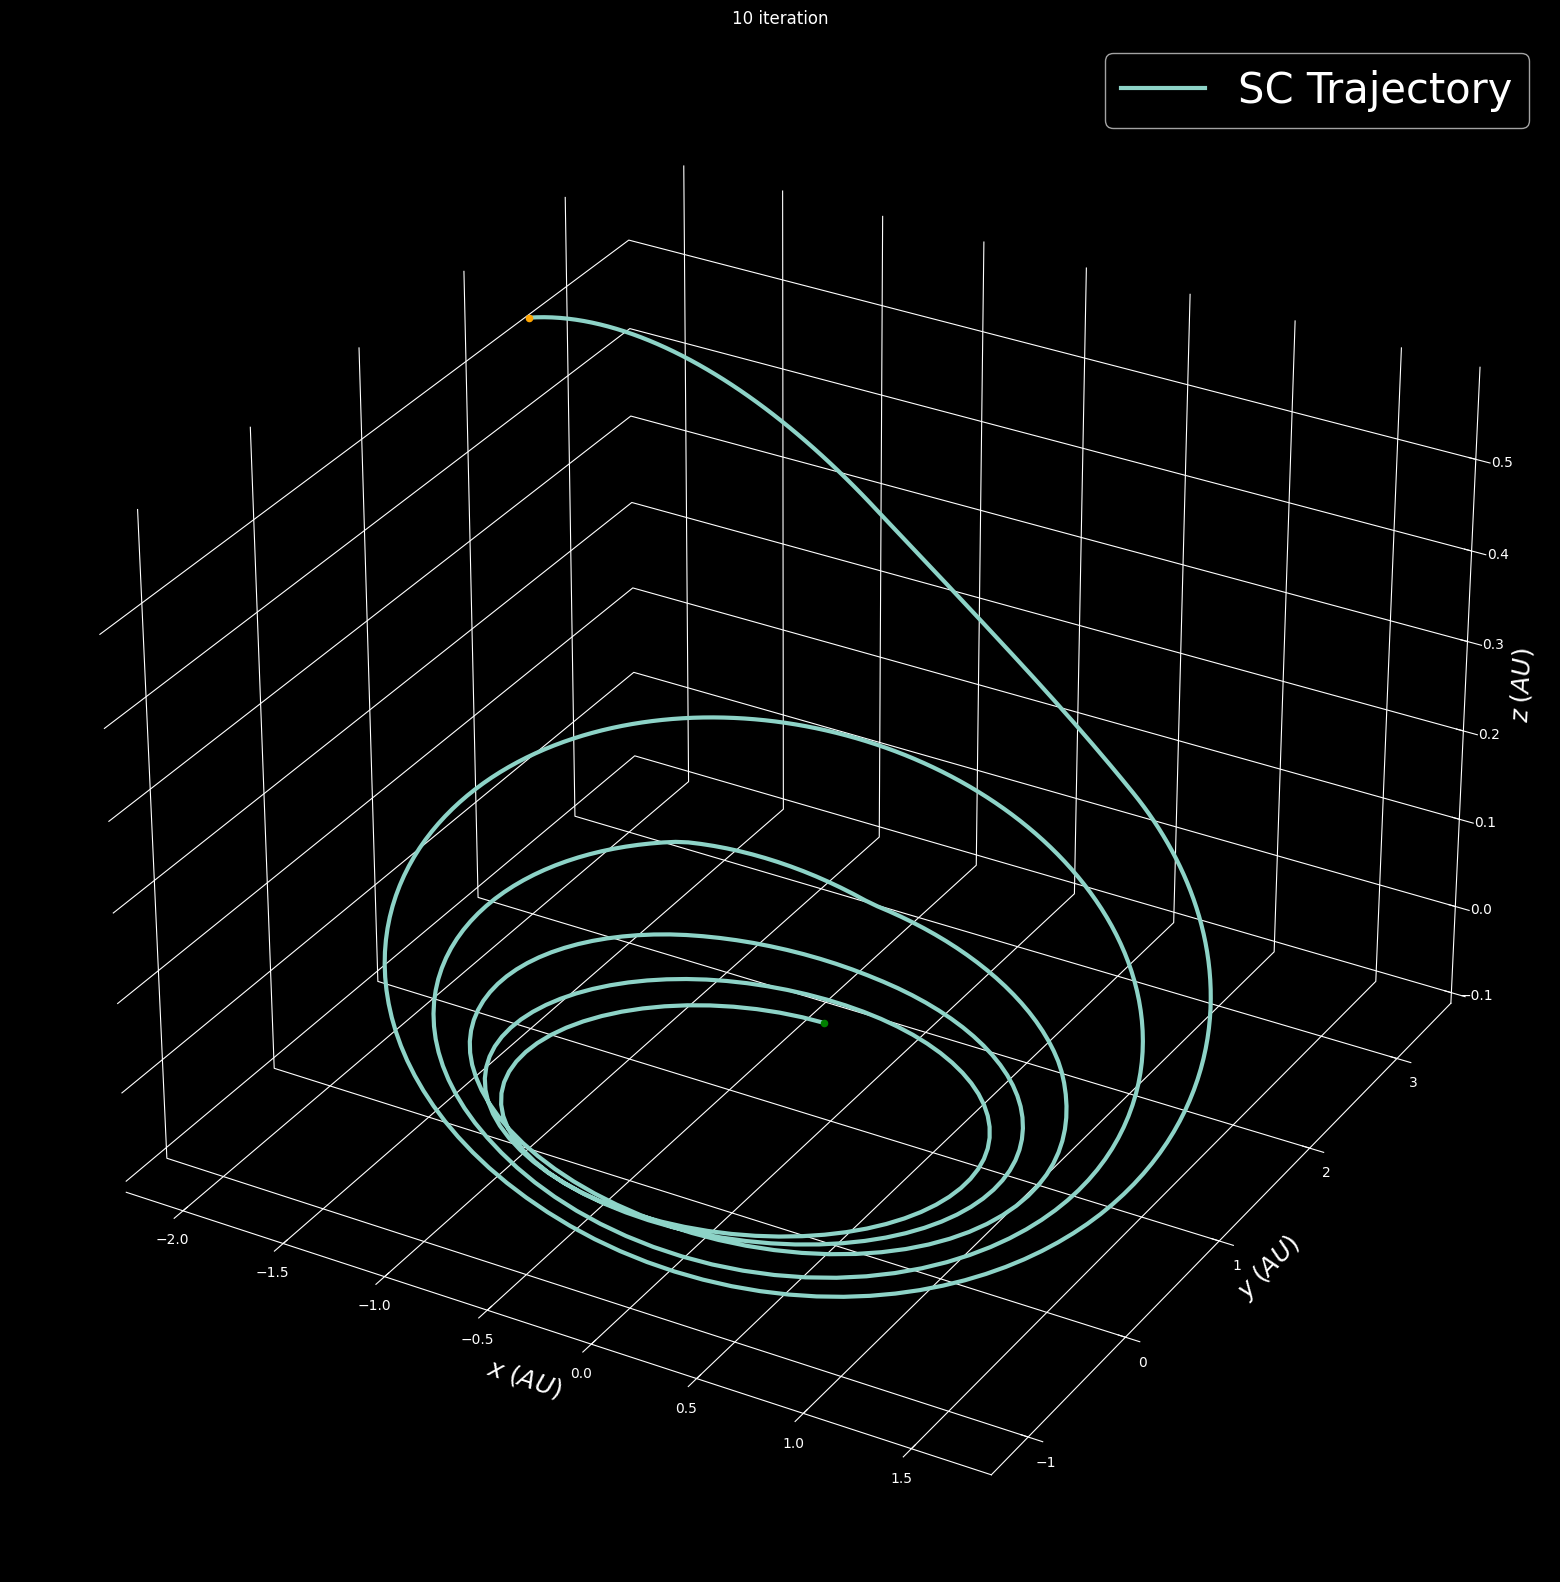

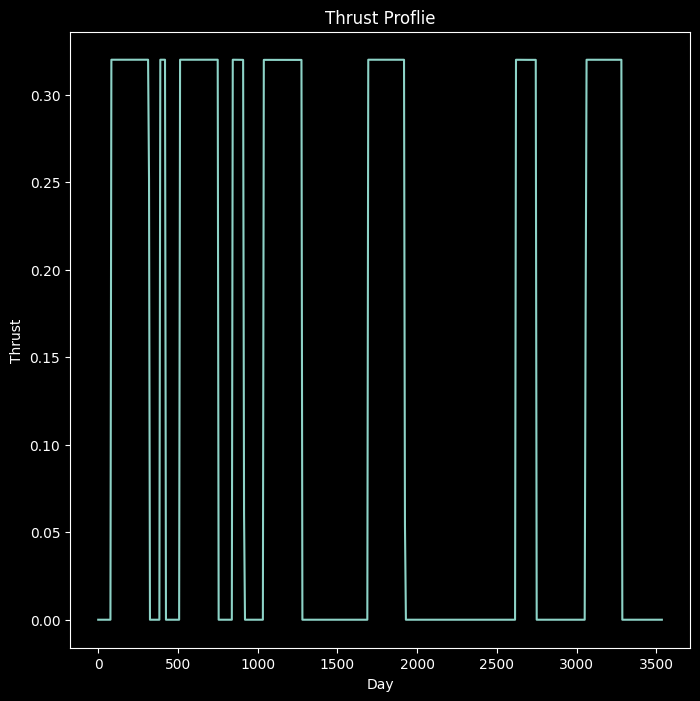

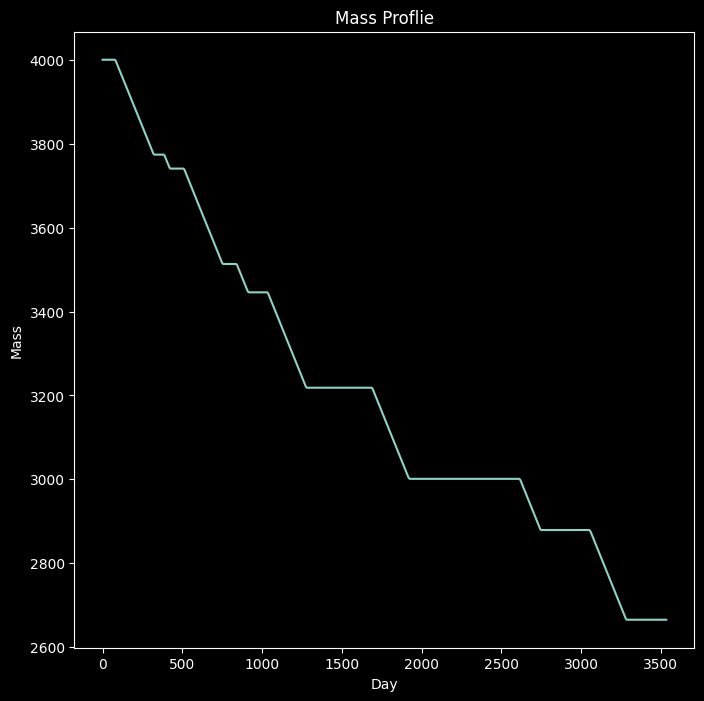

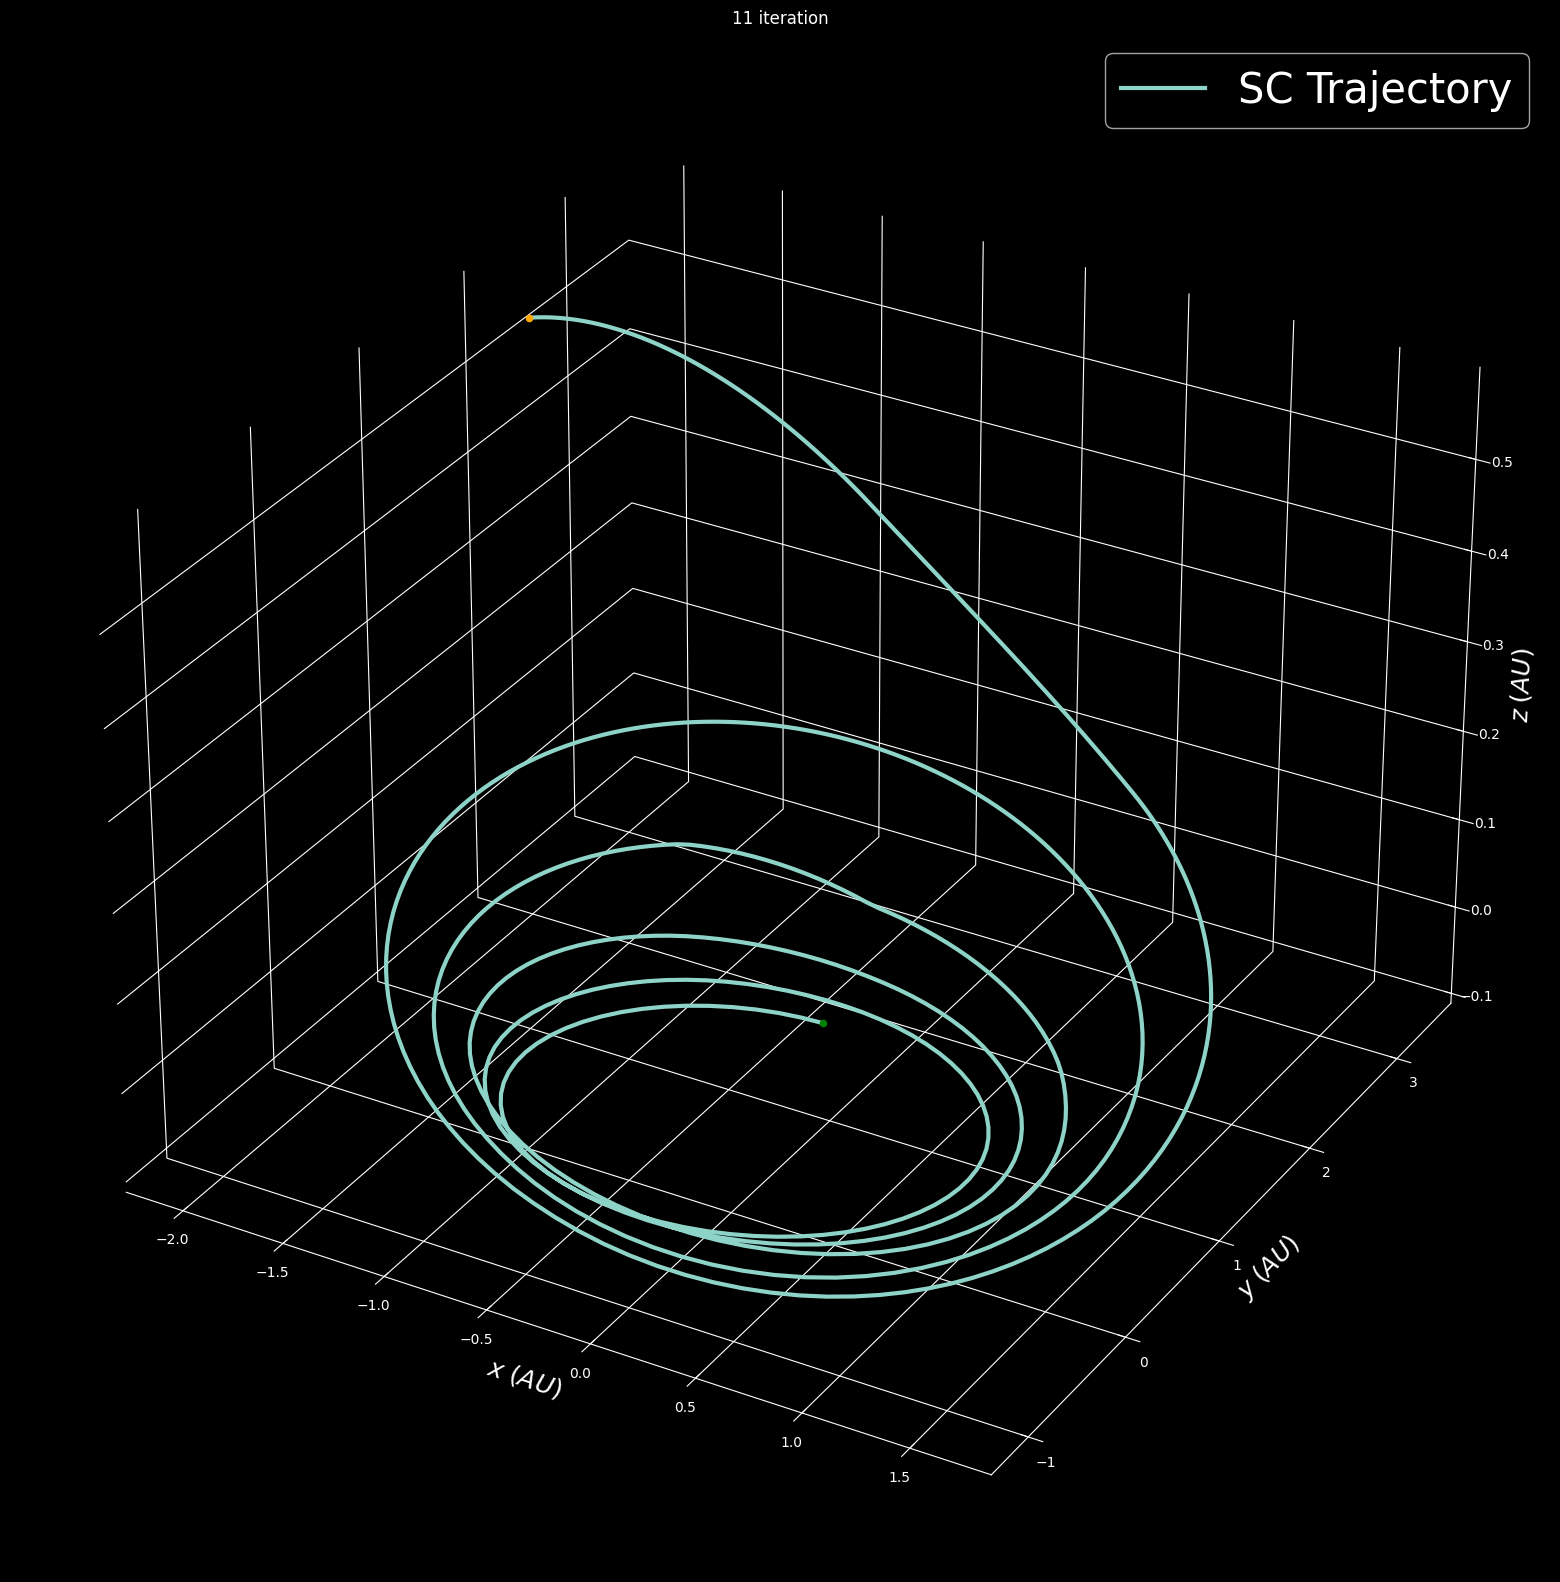

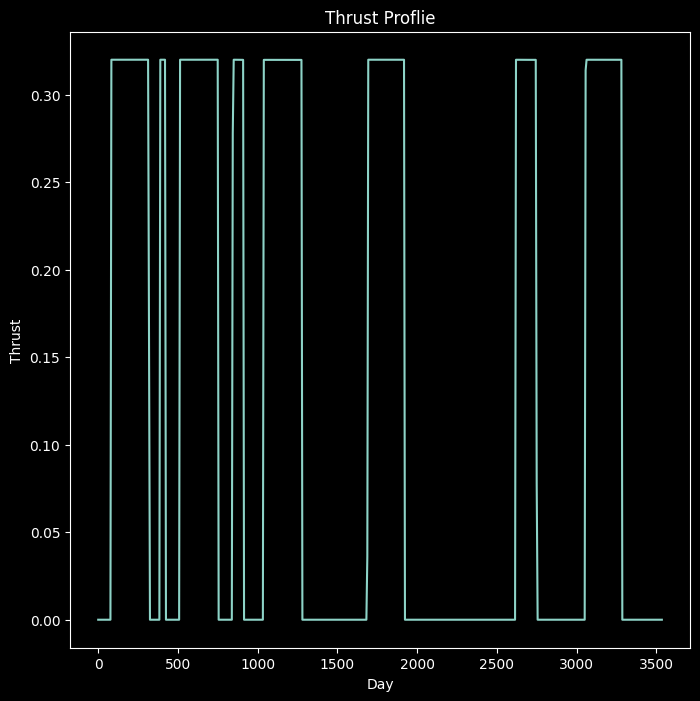

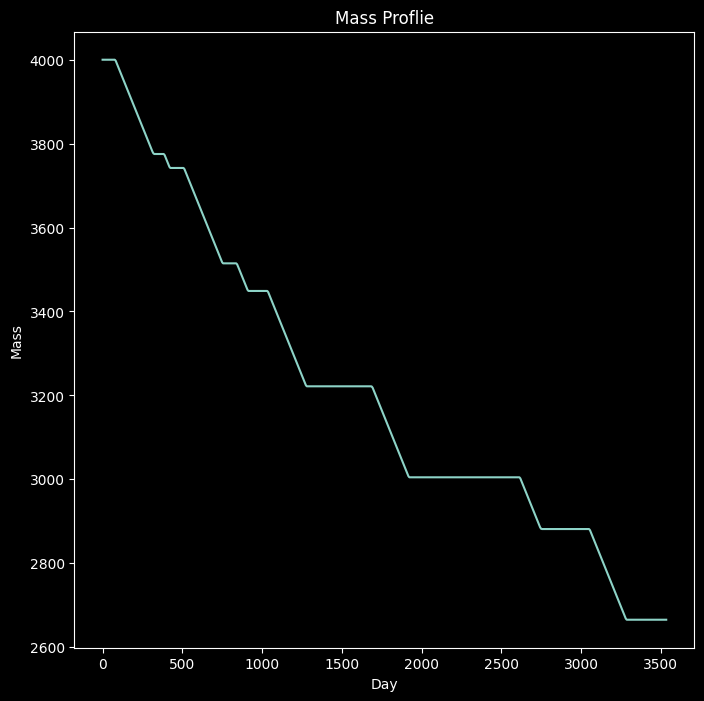

In [5]:

p = cvx_program(dynamics,opt)
converged = False
lc_his = np.zeros((10,))
nlc_his = np.zeros((10,))

tr_his = [p.trust_region]

p.optimize()
tr_his.append(p.trust_region)
nl_cost_his = [p.nonlinear_cost]
l_cost_his = [p.linear_cost]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

plt.title('0 iteration')


r_i = coordinate_conversion.sv_from_mee(opt['x_i'],opt['mu']) 
r_f = coordinate_conversion.sv_from_mee(opt['x_f'],opt['mu']) 

ax.scatter(r_i[0],r_i[1],r_i[2],color='green')
ax.scatter(r_f[0],r_f[1],r_f[2],color='orange')

ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))


# ax.plot(earth_trajectory['y'][0,:],earth_trajectory['y'][1,:], earth_trajectory['y'][2,:], '--g', label='Earth')
# ax.plot(mars_trajectory['y'][0,:],mars_trajectory['y'][1,:], mars_trajectory['y'][2,:], '--',color='orange', label='Mars')

traj = np.zeros((opt['init_traj'].shape[0],3))
for j in range(opt['init_traj'].shape[0]):
    traj[j] = coordinate_conversion.sv_from_mee(p.x.value[j],opt['mu'])[:3]
# alpha_converted = convert_alpha(alpha_profiles_l2[-1],converted)

ax.set_xlabel(r'$x \; (AU)$', fontsize=18)
ax.set_ylabel(r'$y \; (AU)$', fontsize=18)
ax.set_zlabel(r'$z \; (AU)$', fontsize=18)


ax.plot(traj[:,0],traj[:,1],traj[:,2],label='SC Trajectory',linewidth=3)
plt.legend( prop={'size': 30})
plt.savefig('0.png')
i = 1
while not converged:
# for i in range(0):
#     print('b'*7)

    converged,lc,nlc =p.optimize()

    tr_his.append(p.trust_region)
    nl_cost_his.append(p.nonlinear_cost)
    l_cost_his.append(p.linear_cost)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')
    plt.title(f'{i} iteration')

    ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))


    r_i = coordinate_conversion.sv_from_mee(opt['x_i'],opt['mu'])[:3]
    r_f = coordinate_conversion.sv_from_mee(opt['x_f'],opt['mu'])[:3]

    ax.scatter(r_i[0],r_i[1],r_i[2],color='green')
    ax.scatter(r_f[0],r_f[1],r_f[2],color='orange')

    # ax.plot(earth_trajectory['y'][0,:],earth_trajectory['y'][1,:], earth_trajectory['y'][2,:], '--g', label='Earth')
    # ax.plot(mars_trajectory['y'][0,:],mars_trajectory['y'][1,:], mars_trajectory['y'][2,:], '--',color='orange', label='Mars')

    traj = np.zeros((opt['init_traj'].shape[0],3))
    for j in range(opt['init_traj'].shape[0]):
        traj[j] = coordinate_conversion.sv_from_mee(p.x.value[j],opt['mu'])[:3]
    # alpha_converted = convert_alpha(alpha_profiles_l2[-1],converted)

    ax.set_xlabel(r'$x \; (AU)$', fontsize=18)
    ax.set_ylabel(r'$y \; (AU)$', fontsize=18)
    ax.set_zlabel(r'$z \; (AU)$', fontsize=18)

    ax.plot(traj[:,0],traj[:,1],traj[:,2],label='SC Trajectory',linewidth=3)
    plt.legend( prop={'size': 30})
    plt.savefig(f'{i}.png')

    plt.figure(figsize=(8,8))
    plt.plot(np.linspace(0,opt['t_f_days'],opt['N']),p.tau_len.value*np.exp(p.z.value)/(opt['TU']**2)*opt['AUm'])
    plt.xlabel('Day')
    plt.ylabel('Thrust')
    plt.title('Thrust Proflie')
    
    plt.figure(figsize=(8,8))
    plt.plot(np.linspace(0,opt['t_f_days'],opt['N']),np.exp(p.z.value))
    plt.xlabel('Day')
    plt.ylabel('Mass')
    plt.title('Mass Proflie')
    i+=1
    print(i,np.exp(p.z.value[-1]),p.trust_region[0])

In [5]:
# plt.plot(nl_cost_his[9:])
# plt.plot(l_cost_his[9:])

In [ ]:
opt['mu']

0.9985511832829159